# **Context**
Analysts are required to explore data and reflect on the insights. Clear riting skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

# **Objective**
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# **Data Description**
- **Age:** The age of the individual in years.
- **Gender:** The gender of the individual, categorized as male or female.
- **Profession:** The occupation or profession of the individual.
- **Marital_status:** The marital status of the individual, such as married &, single
- **Education:** The educational qualification of the individual Graduate and Post Graduate
- **No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially.
- **Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
- **House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
- **Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No"
- **Salary:** The individual's salary or income.
- **Partner_salary**: The salary or income of the individual's partner, if applicable.
- **Total_salary:** The total combined salary of the individual and their partner (if applicable).
- **Price:** The price of a product or service.
- **Make:** The type of automobile

#**Key Questions**
Explore the data to answer the following key questions:
1. Do men tend to prefer SUVs more compared to women?
2. What is the likelihood of a salaried person buying a Sedan?
3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
4. How does the the amount spent on purchasing automobiles vary by gender?
5. How much money was spent on purchasing automobiles by individuals who took a personal loan?
6. How does having a working partner influence the purchase of higher-priced cars?

# **Exploratory Data Analysis**

## Data Overview

### Let us start by importing the required libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df = pd.read_csv('/content/austo_automobile+%282%29+%281%29.csv')
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

### Understanding the structure of the data

### How many rows and columns are present in the data?

In [ ]:
df.shape

(1581, 14)

- The dataframe is composed of 1581 rows with 14 columns

### What are the datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


- There are 5 integer datatype columns - Age, No_of_Dependents, Salary, Total_salary, Price.
- There are 8 objects columns - Gender, Profession, Marital_status, Education, Personal_loan, House_loan, Partner_working, Make.
- There is 1 float datatype column - Partner_salary.

**Therefore, we can say that there are 6 columns of numerical data and 8 columns of categorical data.**

In [ ]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

- From this we can infer that there are 2 rows with wrong spellings. Specifically for the word "Female"

**Let's find and replace the errors with the right spellings**

In [ ]:
df[df['Gender'] == 'Femal']

Age Gender Profession Marital_status      Education  No_of_Dependents  \
1   53  Femal   Salaried        Married  Post Graduate                 4   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
1           Yes         No             Yes   95500         70300.0   

   Total_salary  Price Make  
1        165800  61000  SUV

In [ ]:
df[df['Gender'] == 'Femle']

Age Gender Profession Marital_status      Education  No_of_Dependents  \
305   40  Femle   Business        Married  Post Graduate                 4   

    Personal_loan House_loan Partner_working  Salary  Partner_salary  \
305            No         No             Yes   70000         70800.0   

     Total_salary  Price Make  
305        140800  65000  SUV

- We observe that the errors are at the index 1 and 305

In [11]:
df.loc[1, 'Gender'] = 'Female'
df.loc[305, 'Gender'] = 'Female'

In [ ]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

- Now the values in 'Gender' are consistent with the no spelling mistakes.
- According to the data, most of the cutomers are 'Males'.

In [ ]:
df['Profession'].value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [ ]:
df['Marital_status'].value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [ ]:
df['Education'].value_counts()

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

In [ ]:
df['Education'].value_counts(normalize=True)

Education
Post Graduate    0.623023
Graduate         0.376977
Name: proportion, dtype: float64

In [ ]:
df['Partner_working'].value_counts()

Partner_working
Yes    868
No     713
Name: count, dtype: int64

In [ ]:
df['Personal_loan'].value_counts()

Personal_loan
Yes    792
No     789
Name: count, dtype: int64

In [ ]:
df['House_loan'].value_counts()

House_loan
No     1054
Yes     527
Name: count, dtype: int64

In [ ]:
df['Make'].value_counts(normalize = True)

Make
Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: proportion, dtype: float64

**Observations made in the data**

-	Salaried professionals are most car owners.
-	We could infer that married customers are significantly higher in number.
-	Post Graduate customers (62%) are more in number than Graduates.
-	Customers with working partners are more in number
-	Almost 50% of the customers have personal loans.
-	Nearly 66% of the customers don't have previous house loans.
-	Most sedan cars are purchased (44%) and SUVs are the least (18%).



**Checking for Duplicate Entries in the Data**

In [ ]:
df.duplicated().sum()

0

The data doesn't contain  duplicated rows.

### Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
df.isnull().sum().sum()

159

- There are total of 159 rows which has null values.

In [ ]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

- There are 53 rows which has missing Gender value.
- There are 106 rows which has missing Partner_salary.

In [ ]:
df[['Partner_salary', 'Gender']].isnull().value_counts()

Partner_salary  Gender
False           False     1425
True            False      103
False           True        50
True            True         3
Name: count, dtype: int64

- There are 1425 rows which contains both Partner_salary and Gender values.
- There are 103 rows which contains only Gender value.
- There are 50 rows which contains only Partner_salary.
- There are 3 rows which contains neither Partner_salary or the Gender values.

- Missing values for 'Gender' is mostly seen in Sedan(45) followed by SUV(6) and Hatchback(2) in total of 53

#### Treating missing values for `'Partner_salary'`

In [ ]:
# creating a dataframe for the values having null - Partner_salary column
df_for_null_partner_salary = df[df['Partner_salary'].isnull()]

In [ ]:
df_for_null_partner_salary.shape

(106, 14)

In [ ]:
# checking how many of these has Partner_working as 'NO'

df_for_null_partner_salary[df['Partner_working'] == 'No']

<ipython-input-14-481657714922>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_for_null_partner_salary[df['Partner_working'] == 'No']


Age  Gender Profession Marital_status      Education  No_of_Dependents  \
40     53  Female   Salaried        Married       Graduate                 1   
115    48  Female   Salaried        Married  Post Graduate                 3   
163    45    Male   Salaried        Married  Post Graduate                 1   
164    45    Male   Business        Married       Graduate                 1   
165    45    Male   Salaried        Married       Graduate                 2   
...   ...     ...        ...            ...            ...               ...   
1559   22    Male   Business        Married  Post Graduate                 3   
1567   22    Male   Salaried         Single       Graduate                 0   
1568   22    Male   Salaried        Married       Graduate                 3   
1577   22    Male   Business        Married       Graduate                 4   
1579   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
40             Yes         No              No   72100             NaN   
115             No         No              No   78000             NaN   
163            Yes        Yes              No   71300             NaN   
164            Yes         No              No   56700             NaN   
165             No         No              No   55100             NaN   
...            ...        ...             ...     ...             ...   
1559           Yes         No              No   52100             NaN   
1567           Yes        Yes              No   39700             NaN   
1568            No        Yes              No   38000             NaN   
1577            No         No              No   32000             NaN   
1579           Yes        Yes              No   32200             NaN   

      Total_salary  Price       Make  
40           72100  60000        SUV  
115          78000  59000        SUV  
163          71300  42000      Sedan  
164          56700  54000      Sedan  
165          55100  65000        SUV  
...            ...    ...        ...  
1559         52100  28000  Hatchback  
1567         39700  23000  Hatchback  
1568         38000  23000      Sedan  
1577         32000  31000  Hatchback  
1579         32200  24000  Hatchback  

[90 rows x 14 columns]

- Out of 106 rows 90 rows have the `Partner_working = 'NO'`

In [ ]:
# checking how many of these has Partner_working as 'Yes' and creating a new dataframe

df_for_null_partner_salary_with_yes = df_for_null_partner_salary[df['Partner_working'] == 'Yes']

<ipython-input-15-0fed54d4cb1b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_for_null_partner_salary_with_yes = df_for_null_partner_salary[df['Partner_working'] == 'Yes']


In [ ]:
df_for_null_partner_salary_with_yes

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Married  Post Graduate                 4   
779    29    Male   Salaried        Married       Graduate                 3   
1345   24    Male   Salaried        Married       Graduate                 3   
1349   24    Male   Business        Married       Graduate                 3   
1546   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
43              No         No             Yes   87600             NaN   
49              No         No             Yes   90300             NaN   
59             Yes         No             Yes   80600             NaN   
111             No         No             Yes   90300             NaN   
209            Yes         No             Yes   53400             NaN   
284             No         No             Yes   70500             NaN   
339            Yes         No             Yes   76800             NaN   
376            Yes         No             Yes   79000             NaN   
424            Yes        Yes             Yes   62000             NaN   
444             No         No             Yes   72300             NaN   
554             No         No             Yes   41600             NaN   
654            Yes        Yes             Yes   64700             NaN   
779             No        Yes             Yes   59000             NaN   
1345           Yes         No             Yes   34600             NaN   
1349           Yes         No             Yes   32400             NaN   
1546           Yes         No             Yes   32600             NaN   

      Total_salary  Price       Make  
43           88200  51000        SUV  
49          170400  69000        SUV  
59           81000  51000        SUV  
111         161100  62000        SUV  
209         123900  64000        SUV  
284         105800  33000      Sedan  
339         115400  50000      Sedan  
376         117400  46000      Sedan  
424         100700  46000      Sedan  
444         112400  48000      Sedan  
554          70100  48000      Sedan  
654          93200  30000  Hatchback  
779          87700  29000  Hatchback  
1345         58800  20000  Hatchback  
1349         58200  18000      Sedan  
1546         59300  20000  Hatchback

In [ ]:
df[df['Salary']+df['Partner_salary']<df['Total_salary']]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

- There are 0 rows where `Total_salary < Salary + Partner_salary`.
- This makes Total_salary a valid data.

In [ ]:
df[df['Salary']+df['Partner_salary']==df['Total_salary']]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0      53    Male   Business        Married  Post Graduate                 4   
1      53  Female   Salaried        Married  Post Graduate                 4   
2      53  Female   Salaried        Married  Post Graduate                 3   
3      53  Female   Salaried        Married       Graduate                 2   
4      53    Male   Salaried        Married  Post Graduate                 3   
...   ...     ...        ...            ...            ...               ...   
1574   22    Male   Salaried        Married       Graduate                 3   
1575   22    Male   Salaried        Married       Graduate                 3   
1576   22    Male   Salaried         Single       Graduate                 2   
1578   22    Male   Business         Single       Graduate                 2   
1580   22    Male   Salaried        Married       Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0               No         No             Yes   99300         70700.0   
1              Yes         No             Yes   95500         70300.0   
2               No         No             Yes   97300         60700.0   
3              Yes         No             Yes   72500         70300.0   
4               No         No             Yes   79700         60200.0   
...            ...        ...             ...     ...             ...   
1574           Yes        Yes              No   34700             0.0   
1575           Yes         No              No   34000             0.0   
1576            No        Yes              No   33300             0.0   
1578            No        Yes              No   32900             0.0   
1580            No         No              No   31600             0.0   

      Total_salary  Price       Make  
0           170000  61000        SUV  
1           165800  61000        SUV  
2           158000  57000        SUV  
3           142800  61000        SUV  
4           139900  57000        SUV  
...            ...    ...        ...  
1574         34700  20000      Sedan  
1575         34000  19000  Hatchback  
1576         33300  27000  Hatchback  
1578         32900  30000  Hatchback  
1580         31600  31000  Hatchback  

[1475 rows x 14 columns]

- The above output shows that Total_salary is sum of 'Partner_salary' and 'Salary'.

**Let's replace values for `Partner_salary` with valid integer by performing `Total_salary-Salary`**

In [ ]:
df['Partner_salary'] = df['Total_salary'] - df['Salary']

In [ ]:
df[df['Salary']+df['Partner_salary']==df['Total_salary']]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0      53    Male   Business        Married  Post Graduate                 4   
1      53  Female   Salaried        Married  Post Graduate                 4   
2      53  Female   Salaried        Married  Post Graduate                 3   
3      53  Female   Salaried        Married       Graduate                 2   
4      53    Male   Salaried        Married  Post Graduate                 3   
...   ...     ...        ...            ...            ...               ...   
1576   22    Male   Salaried         Single       Graduate                 2   
1577   22    Male   Business        Married       Graduate                 4   
1578   22    Male   Business         Single       Graduate                 2   
1579   22    Male   Business        Married       Graduate                 3   
1580   22    Male   Salaried        Married       Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0               No         No             Yes   99300           70700   
1              Yes         No             Yes   95500           70300   
2               No         No             Yes   97300           60700   
3              Yes         No             Yes   72500           70300   
4               No         No             Yes   79700           60200   
...            ...        ...             ...     ...             ...   
1576            No        Yes              No   33300               0   
1577            No         No              No   32000               0   
1578            No        Yes              No   32900               0   
1579           Yes        Yes              No   32200               0   
1580            No         No              No   31600               0   

      Total_salary  Price       Make  
0           170000  61000        SUV  
1           165800  61000        SUV  
2           158000  57000        SUV  
3           142800  61000        SUV  
4           139900  57000        SUV  
...            ...    ...        ...  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  
1578         32900  30000  Hatchback  
1579         32200  24000  Hatchback  
1580         31600  31000  Hatchback  

[1581 rows x 14 columns]

In [ ]:
df.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

- **Sucessfully missing values in `'Partner_salary'` is treated.**


#### Treatment of missing values in `'Gender'`:



**1. Dropping Rows with Missing Values:**
```
     Pros
     - Simple and quick.
     - Reduces potential bias caused by incomplete data.

    Cons
     - If the missing data is not random, dropping it may introduce bias.
     - You lose some information by discarding rows.

```

**2. Filling Missing Values (Imputation):**

```
      Pros
      - Keeps all rows in the dataset.
      - Easy to implement.

      Cons
      - May introduce bias if the missing values are not random (e.g., gender may depend on some other feature).
```

**3. Leaving the Missing Data as Is:**

```
      Pros
      - Preserves all data and doesn't force assumptions.

      Cons
      - May introduce bias if the missing values are not random (e.g., gender may depend on some other feature).
```

##### **Summary of Handling Missing Data:**

- Including missing values in the visualizations where possible to see if there’s any relationship between missing data and car preferences.
- For questions where Gender isn’t a focus (e.g., questions about salary, loans), I will leave them as-is.
- For questions involving Gender, it’s better to visualize missing values explicitly to see if they align with any patterns.

### Outlier detection - Observations and Insights

Outliers are detected in the Columns "No_of_dependents" and "Total_salary"

**`No_of_Dependents`**
- The outlier found was 0. However this cannot be a valid outlier as there are customers who are single or married with 0 dependents.


**`Total_salary`**
Here we see 34 rows where the Total_salary is greater than 140000.

- The Higher Total_salary is contributed by the Partners_salary mostly above 70000.
- Most of these customers are post graduates with higher income.
- The customers Total_salary above 140000 are often choosing the cars priced above 55000.
- All these customers have bought SUVs.

**Because of these reasons these data points cannot be considered as outliers.**

### Check the statistical summary of the data.

In [ ]:
df.describe().T

count          mean           std      min      25%  \
Age               1581.0     31.922201      8.425978     22.0     25.0   
No_of_Dependents  1581.0      2.457938      0.943483      0.0      2.0   
Salary            1581.0  60392.220114  14674.825044  30000.0  51900.0   
Partner_salary    1475.0  20225.559322  19573.149277      0.0      0.0   
Total_salary      1581.0  79625.996205  25545.857768  30000.0  60500.0   
Price             1581.0  35597.722960  13633.636545  18000.0  25000.0   

                      50%      75%       max  
Age                  29.0     38.0      54.0  
No_of_Dependents      2.0      3.0       4.0  
Salary            59500.0  71800.0   99300.0  
Partner_salary    25600.0  38300.0   80500.0  
Total_salary      78000.0  95900.0  171000.0  
Price             31000.0  47000.0   70000.0

#####**Observations on statistical summary:**

- **Age:** Mean value is 32, Minimum value is 22 and, Maximum value is 54 with no null values.
- **No_of_Dependents:** Mean value is 2, Minimum being 0 and, Maximum being 4 with no null values.
- **Salary:** Mean value is 60382, Minimum value is 30000 and, Maximum being 99300 with no null values.
- **Partner_salary:** Mean being 20225, Minimum of 0 and Maximum of 80500 with null values.
- **Total_salary:** Mean being 79626, Minimum of 30000 and Maximum of 171000 with no null values.
- **Price:** Mean being 35597, Minimum of 18000 and, Maximum of 70000.


## Univariate Analysis

#### Univariate Analysis of Numerical Data

##### Analysing Age

<Axes: xlabel='Age', ylabel='Count'>

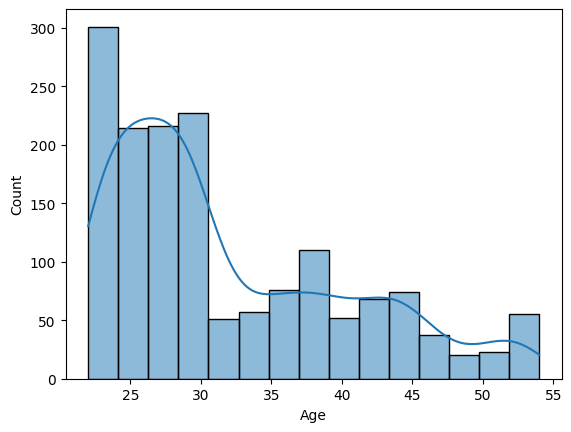

In [ ]:
sns.histplot(data = df, x = 'Age' ,  kde = True, legend = True)

- It is a right skewed graph.
- Majority of the customers range between 25-32

<Axes: xlabel='Age'>

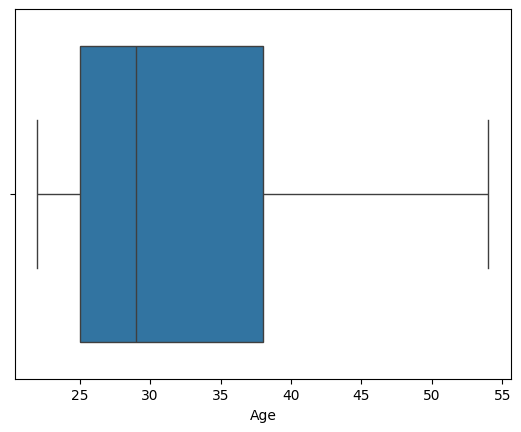

In [ ]:
sns.boxplot(data = df, x = 'Age')

- Minmum is 22.
- First Quartile is 25
- Median is 28
- Third Quartile is 38.
- Maximum is 54.
- No outliers.

##### Analysing No_of_Departments

<Axes: xlabel='No_of_Dependents', ylabel='Count'>

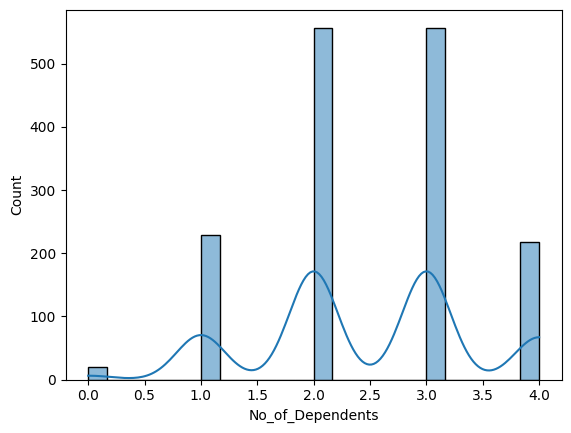

In [ ]:
sns.histplot(data = df, x = 'No_of_Dependents' ,  kde = True)

- Double peak graph.

<Axes: xlabel='No_of_Dependents'>

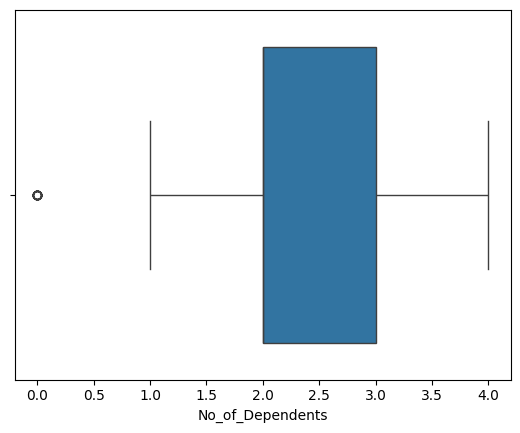

In [ ]:
sns.boxplot(data = df, x = 'No_of_Dependents')

In [ ]:
df['No_of_Dependents'].median()

2.0

In [ ]:
df[df['No_of_Dependents']==0].shape

(20, 14)

- Outliers exist which is 0. However this can't be considered as valid outlier as there cann customers with 0 outliers.
- Minimum is 1.
- Median is 2
- First quartile is 2.
- Second quartile is 3.
- Maximum is 4.

##### Analysing Salary

<Axes: xlabel='Salary', ylabel='Count'>

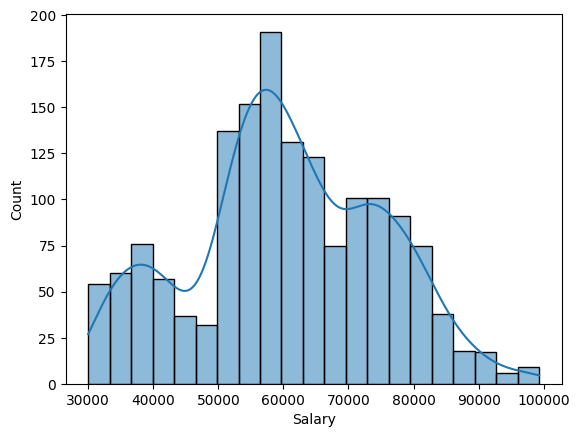

In [ ]:
sns.histplot(data = df, x = 'Salary', kde = True)

- Right Skewed Graph
- Most of the customers salary range between 50000 - 68000.

<Axes: xlabel='Salary'>

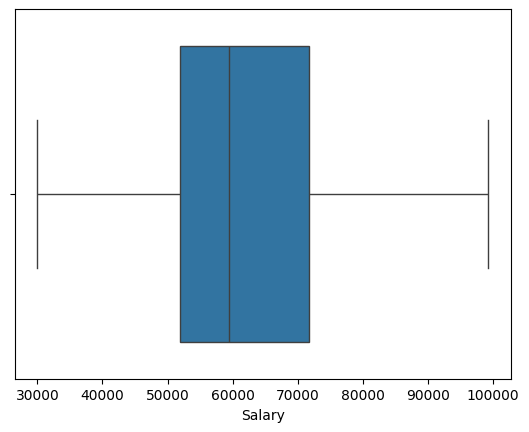

In [ ]:
sns.boxplot(data = df, x = 'Salary')

- No outliers.
- Minimum is 30000
- First Quartile is 50000.
- Median is 59000.
- Third Quartile is 71000.
- Maximum is 100000

##### Analysing Partner_salary

<Axes: xlabel='Partner_salary', ylabel='Count'>

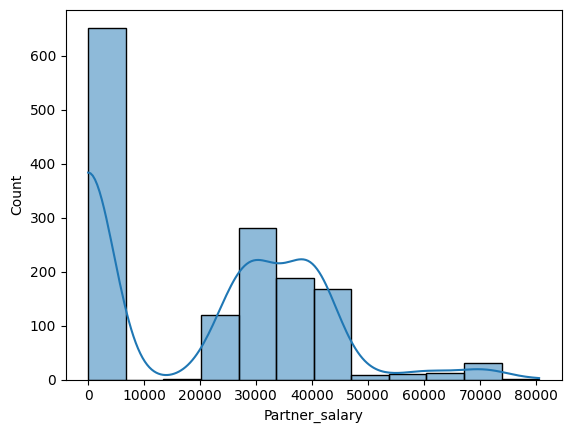

In [ ]:
sns.histplot(data = df, x = 'Partner_salary', kde = True)

- Mostly the partner's salary is ranging between 0-8000

<Axes: xlabel='Partner_salary'>

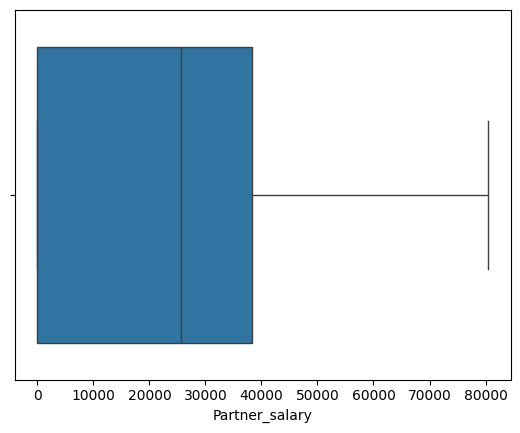

In [ ]:
sns.boxplot(data = df, x = 'Partner_salary')

- Highly Left Skewed Graph
- Minimum and First Quartile is 0.
- Median is 25000.
- Third Quartile is 38000.
- Maximum is 80000.
- No outliers.

##### Analysing Total_Salary

<Axes: xlabel='Total_salary', ylabel='Count'>

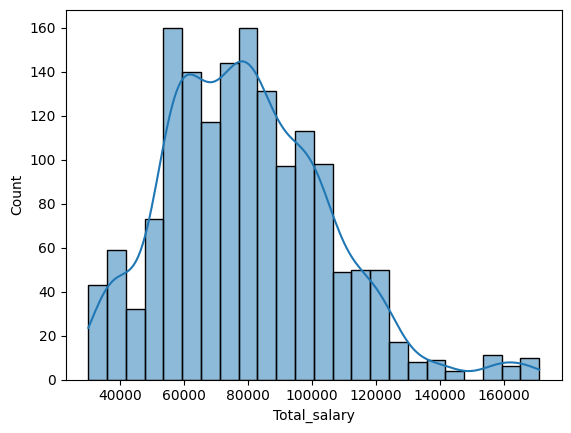

In [ ]:
sns.histplot(data = df, x = 'Total_salary', kde = True)

- It is rigth skewed graph.
- Majority of the customers total salary ranges between 50000 - 90000.


<Axes: xlabel='Total_salary'>

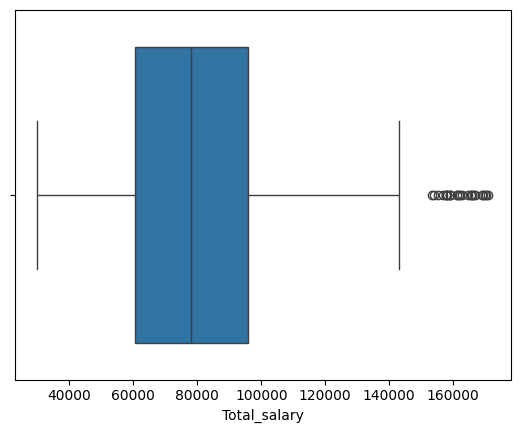

In [ ]:
sns.boxplot(data = df, x = 'Total_salary')

- Outliers Exist.
- Minimum is 30000.
- First Quartile is 60000.
- Median is 78000.
- Third Quartile is 100000.
- Maximum is 140000.

In [ ]:
df[df['Total_salary'] > 140000]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0     53    Male   Business        Married  Post Graduate                 4   
1     53  Female   Salaried        Married  Post Graduate                 4   
2     53  Female   Salaried        Married  Post Graduate                 3   
3     53  Female   Salaried        Married       Graduate                 2   
5     53  Female   Salaried        Married  Post Graduate                 3   
17    49  Female   Salaried        Married  Post Graduate                 4   
18    49  Female   Business        Married  Post Graduate                 3   
19    49    Male   Salaried        Married  Post Graduate                 3   
29    46  Female   Salaried        Married  Post Graduate                 2   
30    46    Male   Salaried        Married  Post Graduate                 4   
31    46    Male   Business        Married       Graduate                 2   
41    53  Female   Salaried        Married  Post Graduate                 4   
42    52  Female   Salaried        Married  Post Graduate                 3   
49    52  Female   Business        Married  Post Graduate                 4   
56    51  Female   Salaried        Married  Post Graduate                 2   
57    54    Male   Business        Married  Post Graduate                 2   
58    54    Male   Salaried        Married  Post Graduate                 3   
65    53  Female   Business        Married  Post Graduate                 3   
66    53  Female   Business        Married       Graduate                 2   
75    52  Female   Salaried        Married  Post Graduate                 4   
76    52    Male   Salaried        Married       Graduate                 2   
87    51    Male   Salaried        Married  Post Graduate                 3   
98    50  Female   Salaried        Married  Post Graduate                 4   
99    50    Male   Salaried        Married  Post Graduate                 3   
103   49    Male   Business        Married       Graduate                 4   
111   48  Female   Business        Married       Graduate                 3   
116   47    Male   Business        Married       Graduate                 4   
117   47    Male   Salaried        Married       Graduate                 2   
130   46  Female   Salaried        Married  Post Graduate                 3   
131   46    Male   Salaried        Married  Post Graduate                 3   
277   41    Male   Salaried        Married  Post Graduate                 3   
304   40    Male   Salaried        Married  Post Graduate                 4   
305   40  Female   Business        Married  Post Graduate                 4   
329   39  Female   Salaried        Married  Post Graduate                 3   

    Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0              No         No             Yes   99300         70700.0   
1             Yes         No             Yes   95500         70300.0   
2              No         No             Yes   97300         60700.0   
3             Yes         No             Yes   72500         70300.0   
5              No         No             Yes   79800         60500.0   
17             No         No             Yes   95100         70600.0   
18             No         No             Yes   92600         70300.0   
19            Yes         No             Yes   98400         60600.0   
29             No         No             Yes   98300         70700.0   
30             No         No             Yes   94900         70700.0   
31            Yes         No             Yes   91100         70000.0   
41             No         No             Yes   96600         70300.0   
42             No         No             Yes   94900         60300.0   
49             No         No             Yes   90300             NaN   
56             No         No             Yes   90600         80400.0   
57             No         No             Yes   93900         60200.0   
58             

In [ ]:
df[df['Total_salary'] > 140000].shape

(34, 14)

Here we see 34 rows where the Total_salary is greater than 140000.

- The Higher Total_salary is contributed by the Partners_salary mostly above 70000.
- Most of these customers are post graduates with higher income.
- The customers Total_salary above 140000 are often choosing the cars priced above 55000.
- All these customers have bought SUVs.

**Because of these reasons these data points cannot be considered as outliers.**

##### Analysing Price

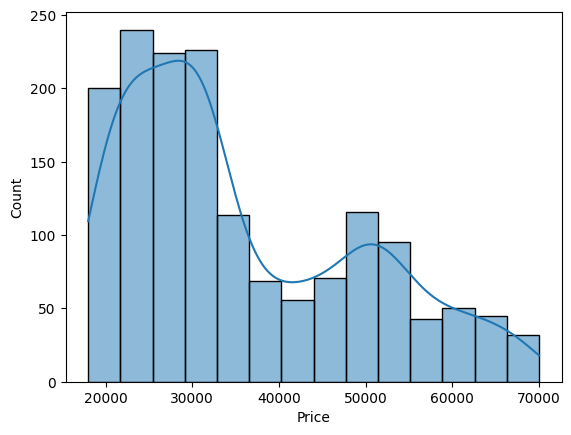

In [ ]:
sns.histplot(data = df, x = 'Price', kde = True);

- It is a right skewed graph.
- Majority of the purchases are between 18000 to 35000.


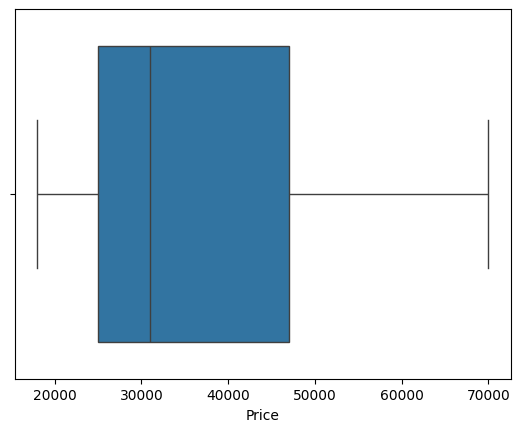

In [ ]:
sns.boxplot(data = df, x = 'Price');

We can observe that the:
 - Median is around 31000.
 - First Quartile is around 25000.
 - Third Quartile is around 48000.
 - Minimum is 18000.
 - Maximum is 70000.
 - No outliers.

#### Univariate Analysis of Categorical Data

##### Analysing Profession

<Axes: xlabel='Profession', ylabel='count'>

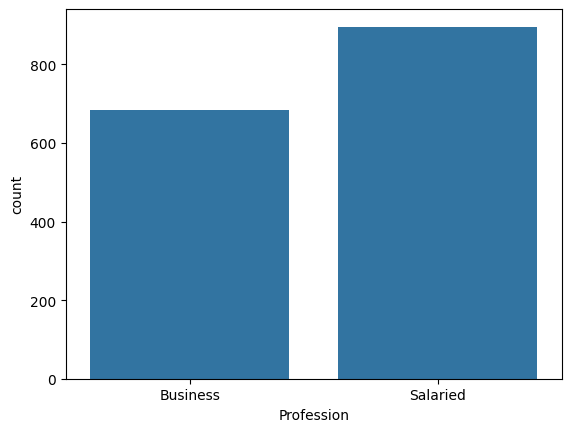

In [ ]:
sns.countplot(data = df, x = 'Profession')

- The count of Salaried is morethann 800 and Business is less than 700.

##### Analysing Marital_status

<Axes: xlabel='Marital_status', ylabel='count'>

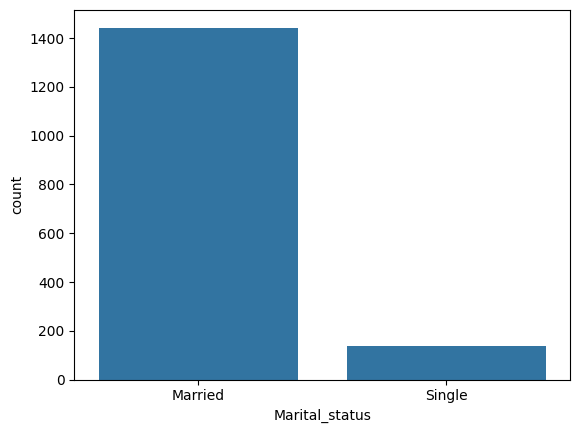

In [ ]:
sns.countplot(data = df, x = 'Marital_status')

- Majority of the customers are Married, there is a count less than 200 for single car owners.

##### Analysing Education

<Axes: xlabel='Education', ylabel='count'>

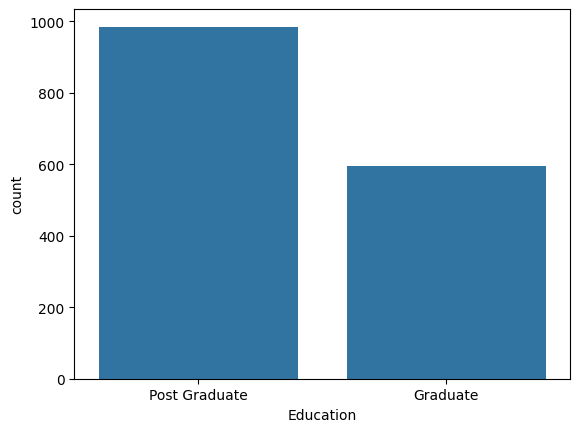

In [ ]:
sns.countplot(data = df, x = 'Education')

- The count of Post graduate customers is nearly 400 for a count of graduate customers.

##### Analysing Personal_loan

<Axes: xlabel='Personal_loan', ylabel='count'>

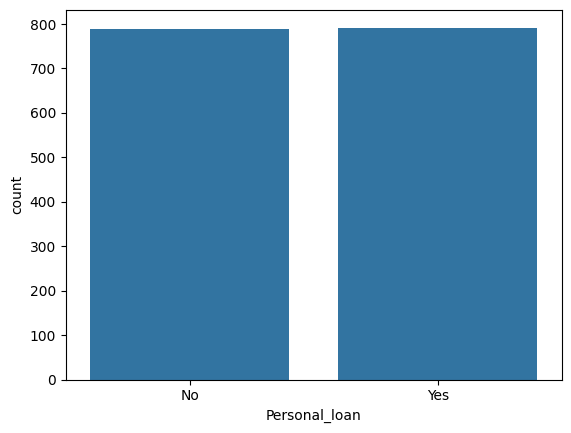

In [ ]:
sns.countplot(data = df, x = 'Personal_loan')

- The count of customers with and without personal loan are almost the same

##### Analysing House_loan

<Axes: xlabel='House_loan', ylabel='count'>

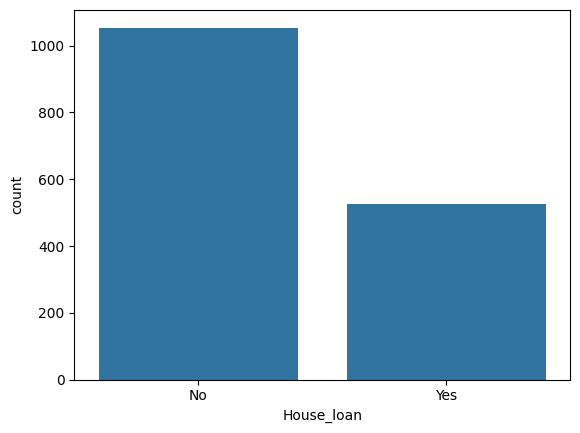

In [ ]:
sns.countplot(data = df, x = 'House_loan')

- Almost 70% of the customers doesn't have house loans.

##### Analysing Partner_working

<Axes: xlabel='Partner_working', ylabel='count'>

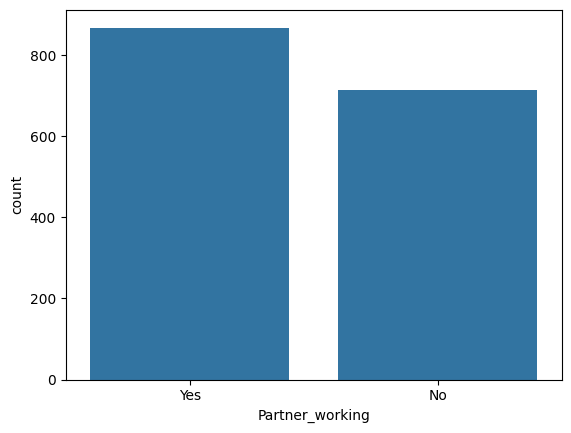

In [ ]:
sns.countplot(data = df, x = 'Partner_working')

- The partner_working status being 'YES' is comparitively more than 'NO'. The difference between the count is almost by 100.

#####Analysing Make

<Axes: xlabel='Make', ylabel='count'>

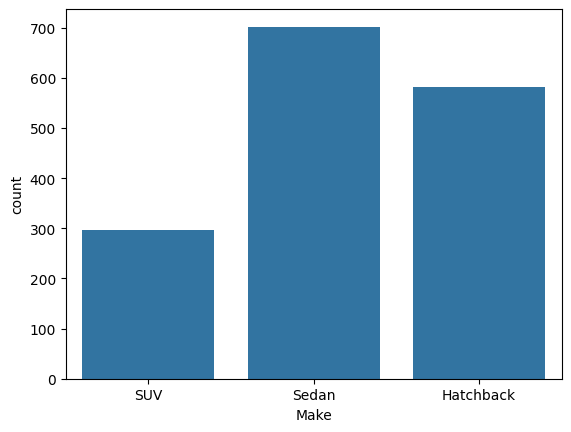

In [ ]:
sns.countplot(data = df, x = 'Make')

- Most of the cars purchased are Sedan follwed by Hatchback.
- The least purchased cars are SUVs

## Bivariate Analysis

In [ ]:
df.head(3)

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV

<Axes: xlabel='Price', ylabel='Total_salary'>

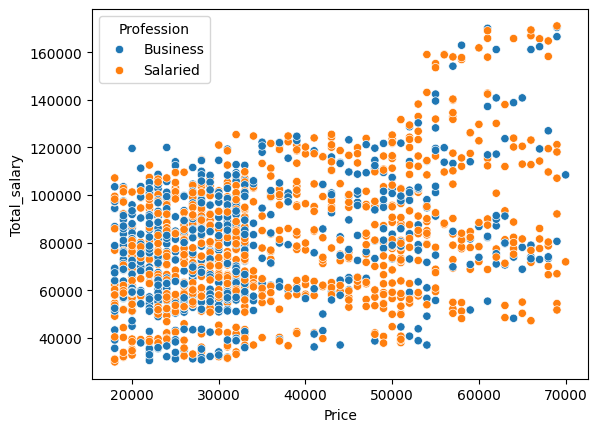

In [ ]:
sns.scatterplot(data = df, x = 'Price', y = 'Total_salary', hue = 'Profession' )

<Axes: xlabel='Partner_working', ylabel='Price'>

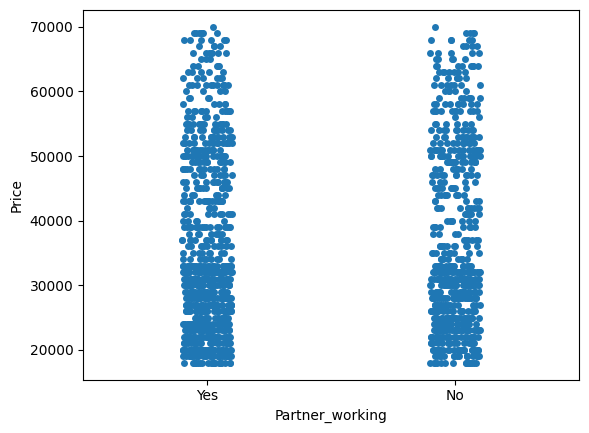

In [ ]:
sns.stripplot(data = df, x ='Partner_working' , y = 'Price')

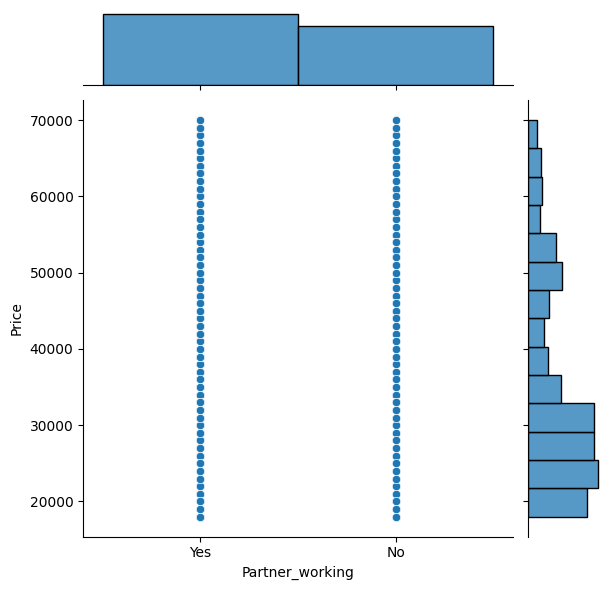

In [ ]:
sns.jointplot(data = df, x ='Partner_working' , y = 'Price')

<Axes: xlabel='Profession', ylabel='count'>

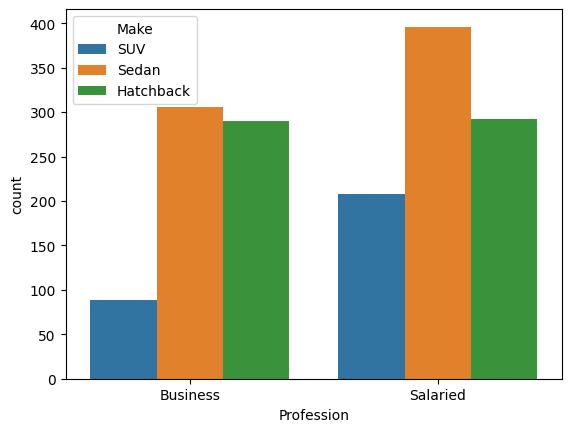

In [ ]:
sns.countplot(data = df, x ='Profession' , hue = 'Make')

<Axes: xlabel='Profession', ylabel='count'>

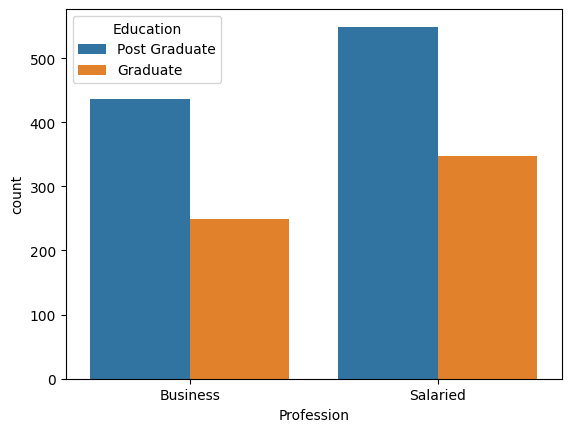

In [ ]:
sns.countplot(data = df, x ='Profession' , hue = 'Education')

<Axes: xlabel='Profession', ylabel='count'>

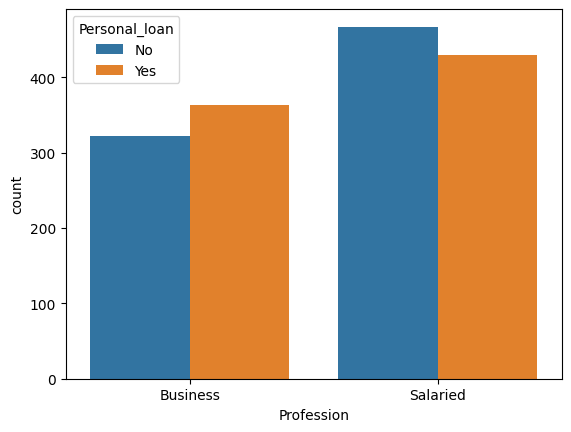

In [ ]:
sns.countplot(data = df, x ='Profession' , hue = 'Personal_loan')

<Axes: xlabel='Profession', ylabel='count'>

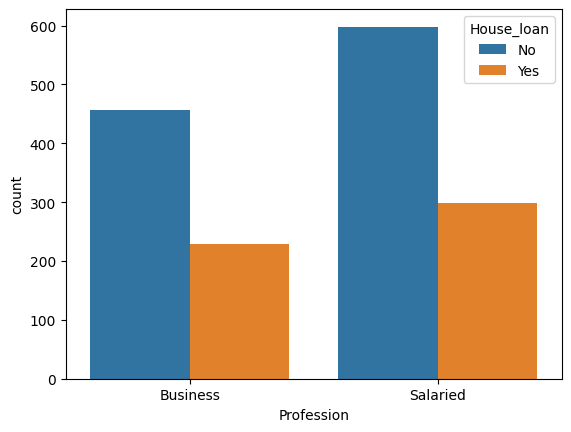

In [ ]:
sns.countplot(data = df, x ='Profession' , hue = 'House_loan')

<Axes: xlabel='Profession', ylabel='count'>

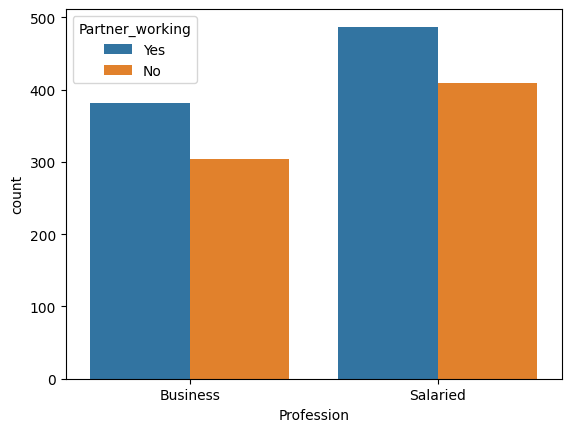

In [ ]:
sns.countplot(data = df, x ='Profession' , hue = 'Partner_working')

<Axes: xlabel='Profession', ylabel='count'>

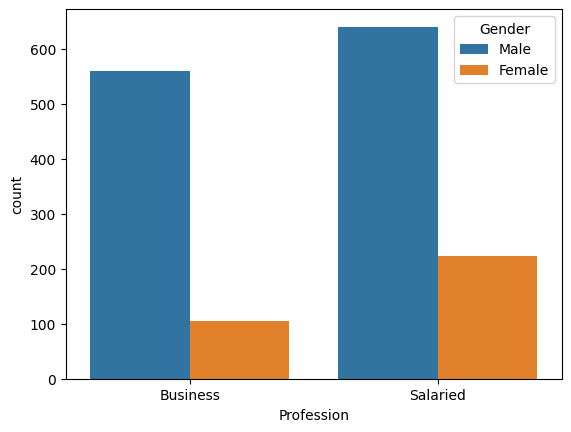

In [ ]:
sns.countplot(data = df, x ='Profession', hue = 'Gender' )

<Axes: xlabel='Make', ylabel='count'>

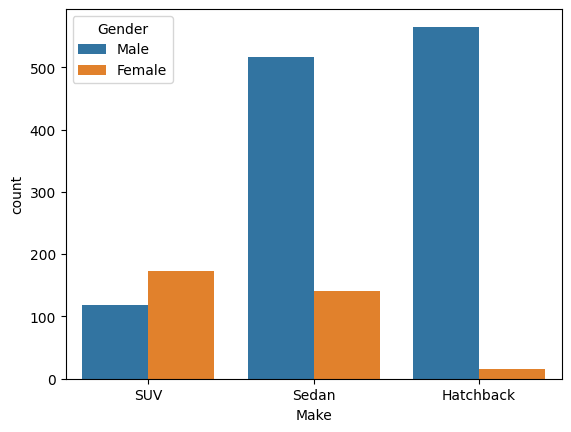

In [ ]:
sns.countplot(data = df, x="Make", hue = 'Gender')

<Axes: xlabel='Make', ylabel='Total_salary'>

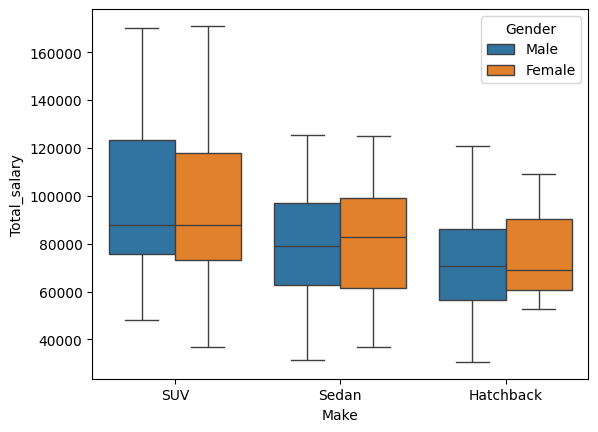

In [ ]:
sns.boxplot(data = df, x = 'Make', y = 'Total_salary', hue= 'Gender')

<Axes: xlabel='Partner_working', ylabel='count'>

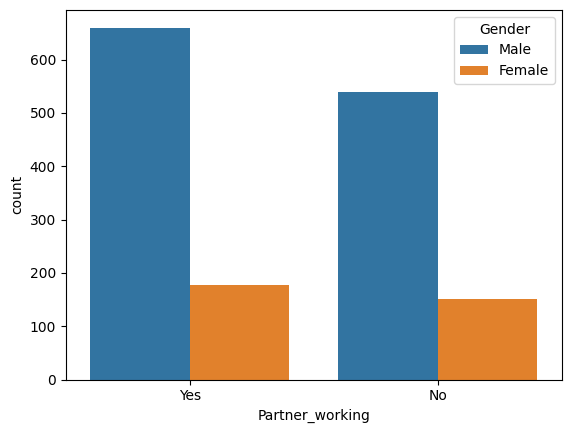

In [ ]:
sns.countplot(data = df, x = 'Partner_working', hue = 'Gender')

<Axes: xlabel='No_of_Dependents', ylabel='Count'>

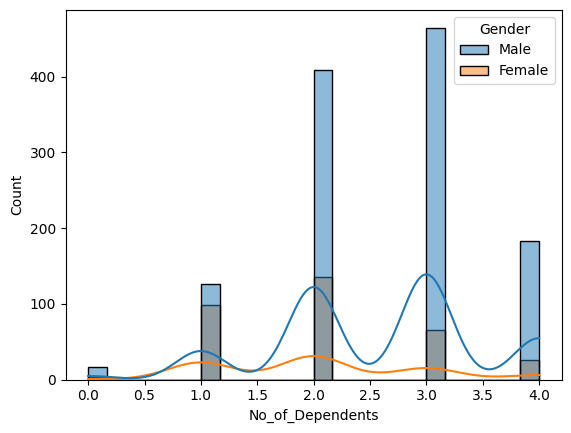

In [ ]:
sns.histplot(data = df, x = 'No_of_Dependents', hue = 'Gender', kde = True)

<Axes: ylabel='No_of_Dependents'>

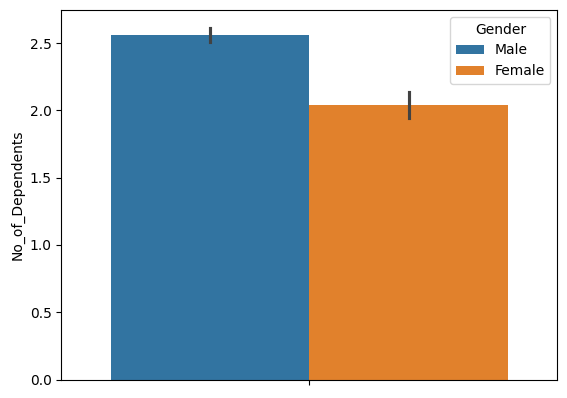

In [ ]:
sns.barplot(data = df, y = 'No_of_Dependents', hue = 'Gender')

<Axes: ylabel='No_of_Dependents'>

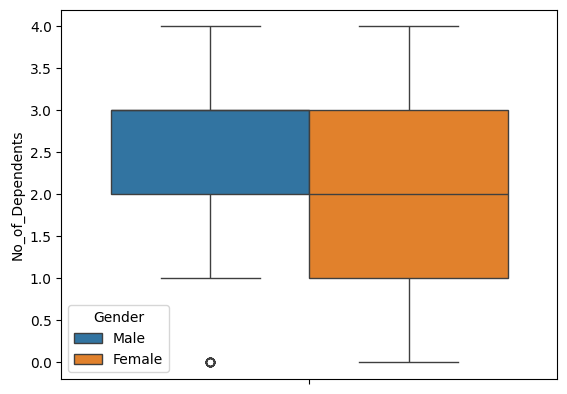

In [ ]:
sns.boxplot(data = df, y = 'No_of_Dependents', hue = 'Gender')

<Axes: xlabel='Total_salary', ylabel='Count'>

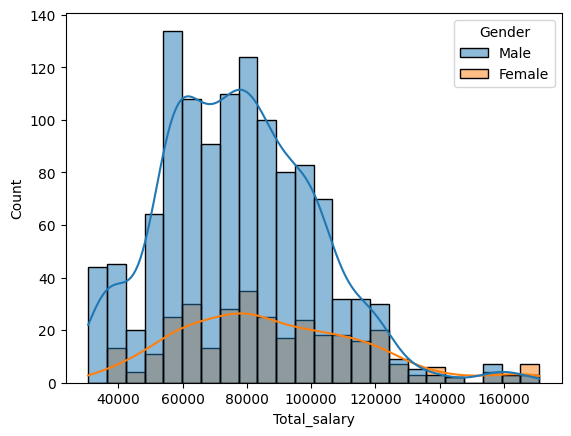

In [ ]:
sns.histplot(data = df, x = 'Total_salary', hue= 'Gender', kde = True)

<Axes: xlabel='Total_salary'>

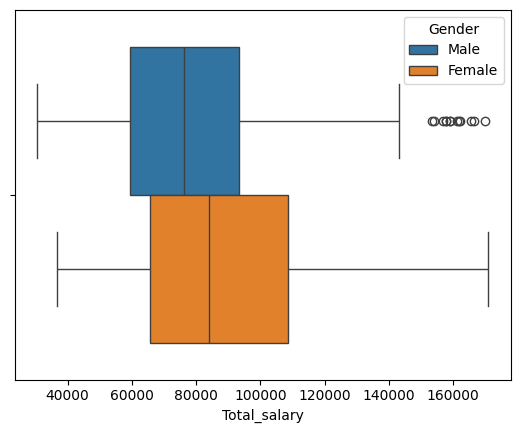

In [ ]:
sns.boxplot(data = df, x = 'Total_salary', hue= 'Gender')

## Bivariate Analysis

### Bivariate Analysis between `'Partner_salary'` and `'Total_salary'`

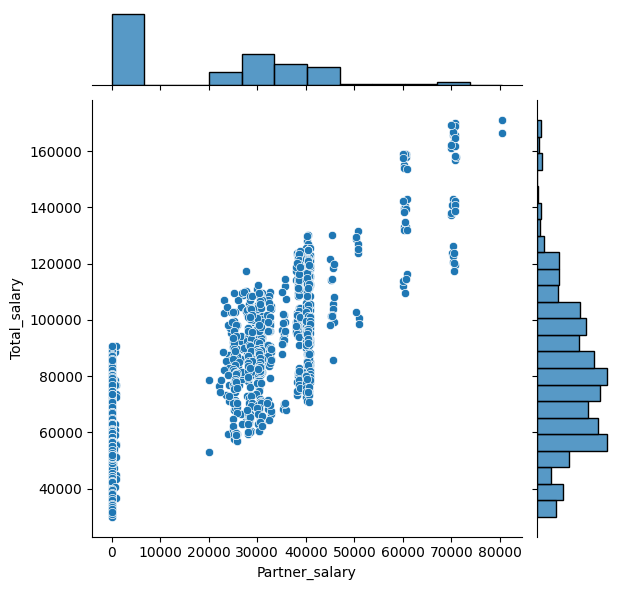

In [ ]:
sns.jointplot(data = df, x="Partner_salary", y = 'Total_salary')

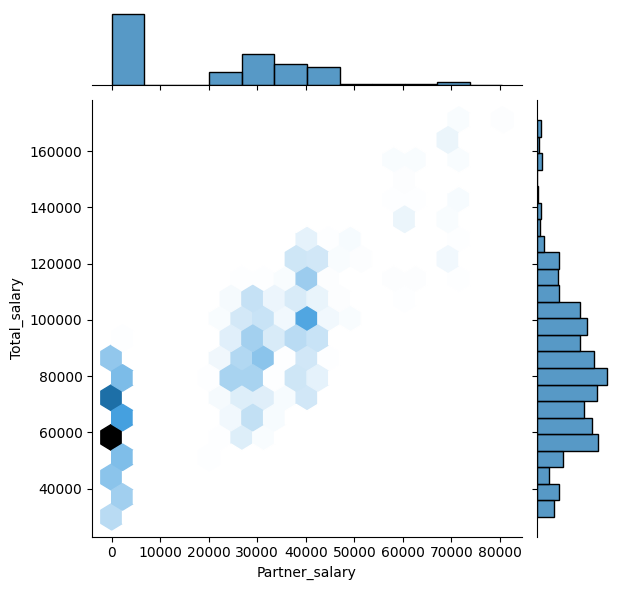

In [ ]:
sns.jointplot(data = df, x="Partner_salary", y = 'Total_salary', kind = 'hex')

- Partner's earning between 0-5000 have contributed for Total_salary ranging between 20000-80000.
- And there is absolute zero number for the Partner_salary between 5000-18000 contributing for the Total_salary.
- The Partner_salary ranging between 20000-50000 are contributing for the Total_salary between 60000-130000.
- However, Partner_salary 40000-45000 are having the Total_salary upto 110000.
- The customers are earning mostly between 50000-62000 as a Total_salary.
- There are less number of Partner's earning salary between 50000-80000. However they are contributing for the Total_salary upto 160000.

### Bivariate Analysis between `'Age'` and `'Price'`

<Axes: xlabel='Age', ylabel='Price'>

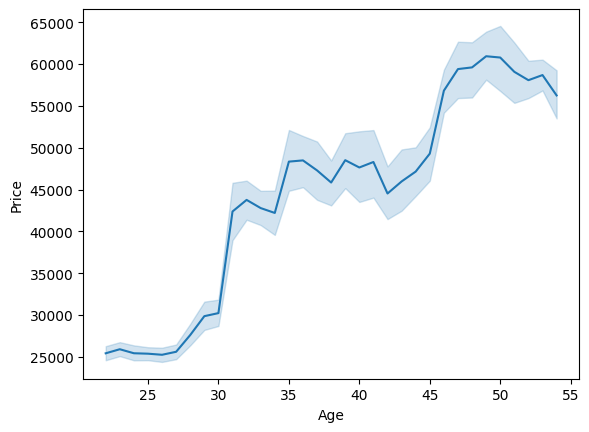

In [ ]:
sns.lineplot(data = df, x = 'Age', y = 'Price')

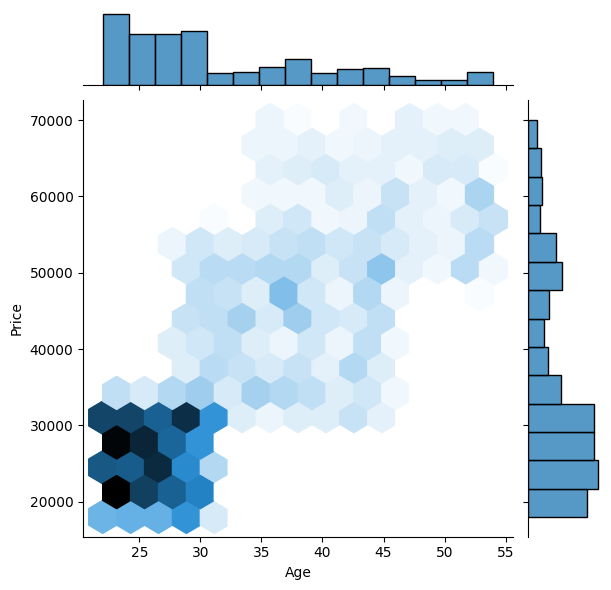

In [ ]:
sns.jointplot(data = df, x = 'Age', y = 'Price', kind = 'hex')

- We notice that the customers aged between 20 - 31 are often the owners of cars pricing in the range of 20000 - 35000.
   - Customers of these age group are majority in number.
   - Some of highly concentrated data points are age between 20-25 for the car price of 20000-23000 and 27000-29000.  
   - Similary,
- Age group between 30-45 are purchasing the cars of Price 30000-55000. However the number of these customers are less than age group 20-30.
- From the line plot we notice that, the cars purchased by the older customers are often expensive.
   - This is significantly seen between the age group of 45-55 where the car price ranging between 50000-70000.

### Bivariate Analysis between `'Salary'` and `'Total_salary'`

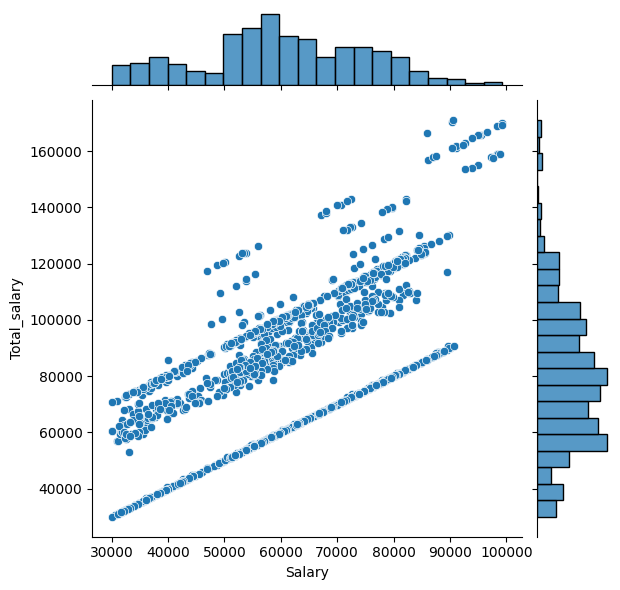

In [ ]:
sns.jointplot(data = df, x = 'Salary', y = 'Total_salary')

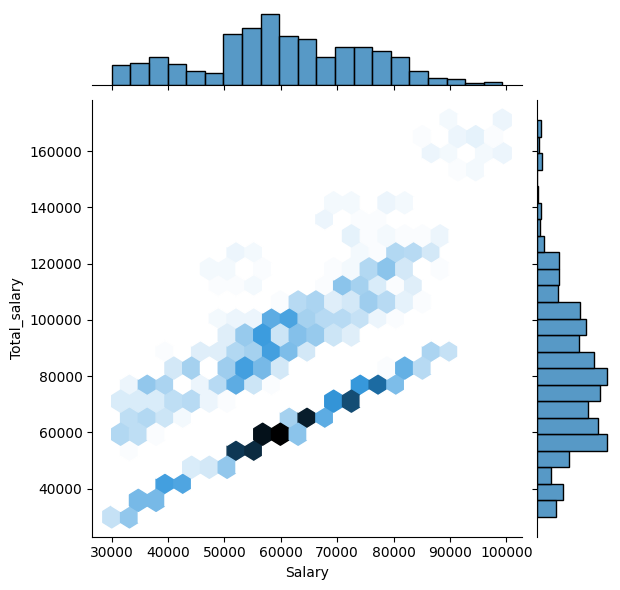

In [ ]:
sns.jointplot(data = df, x = 'Salary', y = 'Total_salary', kind = 'hex')

- It is a positively coorelated variables.
- Majority of the customers with 'Salary' ranging 50000-80000 have the Total_salary ranging between 50000-70000.
  - Even in this range most of the customers salary is between 50000-60000 with the same range of 'Total_salary'.
  - Second densely distributed points in this range is for Salary between 60000-70000 with the similary range of Total_salary.
- It is observed that as Salary increases the Total_salary is also increasing.

### Bivariate Analysis between `'Salary'` and `'Age'`

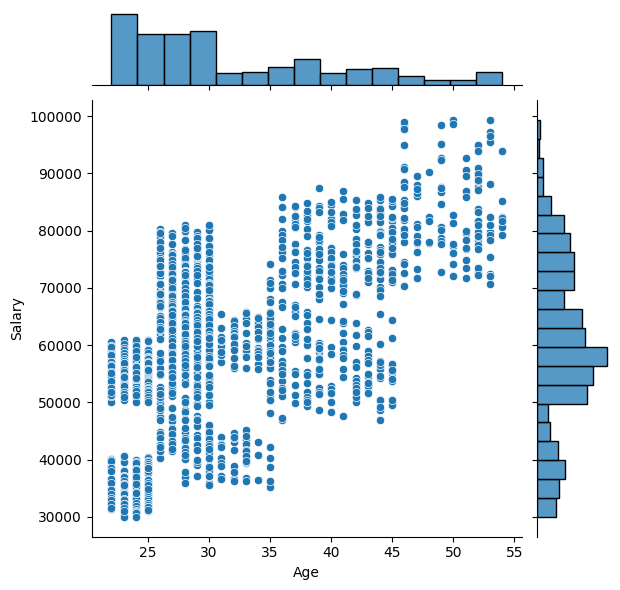

In [ ]:
sns.jointplot(data = df, x = 'Age', y = 'Salary')

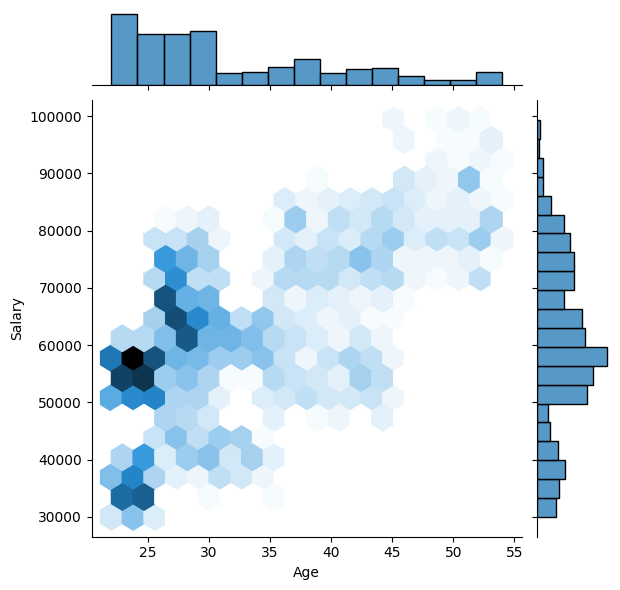

In [ ]:
sns.jointplot(data = df, x = 'Age', y = 'Salary', kind = 'hex')

<Axes: xlabel='Age', ylabel='Salary'>

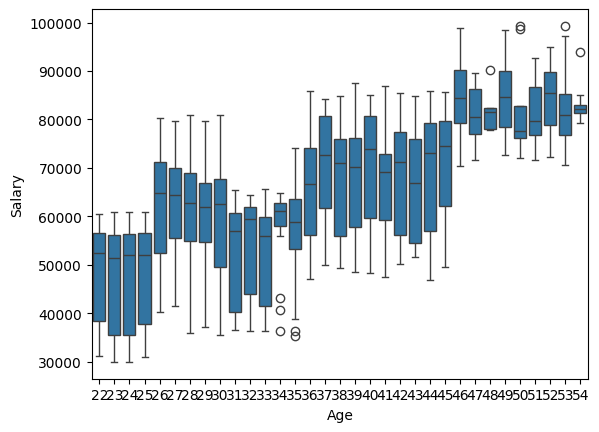

In [ ]:
sns.boxplot(data = df, x = 'Age', y = 'Salary')

- It is positively correlated graph.
- The customers of age group pf 18-30 are earning between 20000-60000.
  - However, the it is seen that mojority of them are earning between 50000-60000.
  - The rest are earning between 20000-40000.
- As the the customer is older their salary also increases significantly.
- However, the customers between age of 40-55 are less in number compared to the customers of age between 20-35.

### Bivariate Analysis between `'Total_salary'` and `'Age'`

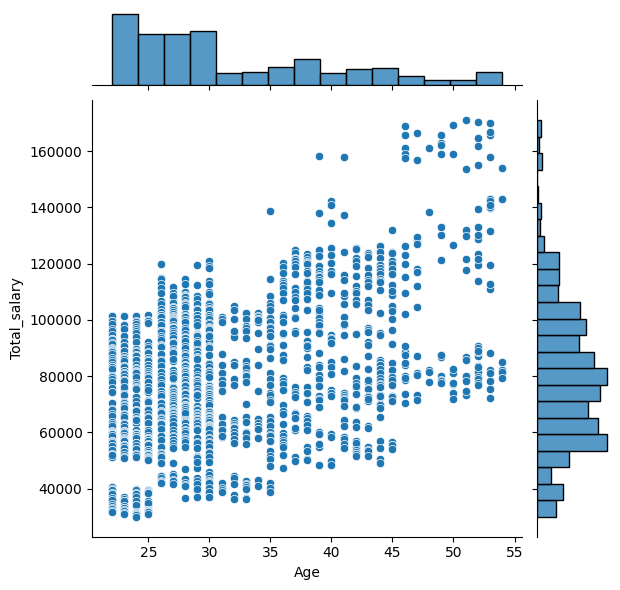

In [ ]:
sns.jointplot(data = df, x = 'Age', y = 'Total_salary')

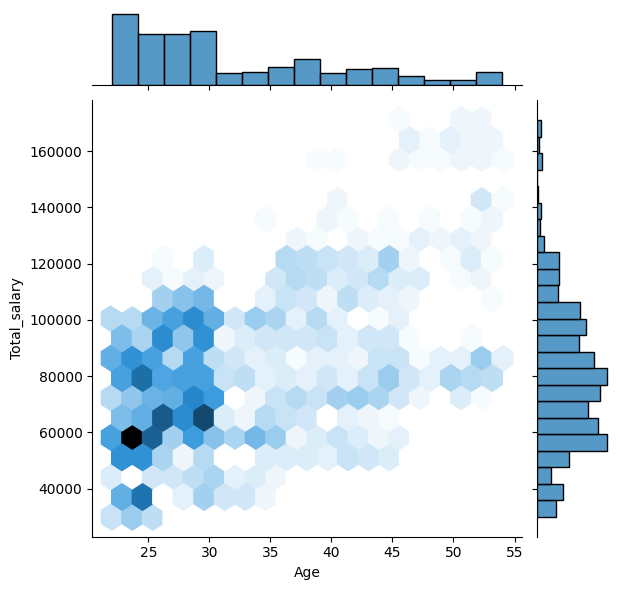

In [ ]:
sns.jointplot(data = df, x = 'Age', y = 'Total_salary', kind = 'hex')

- Customers aging beyween 20-30 are more in number and they earn the Total_salary ranging between 25000 USD- 100000 USD.
- It is positively correlated graph.


### Bivariate Analysis between `'Salary'` and `'Price'`

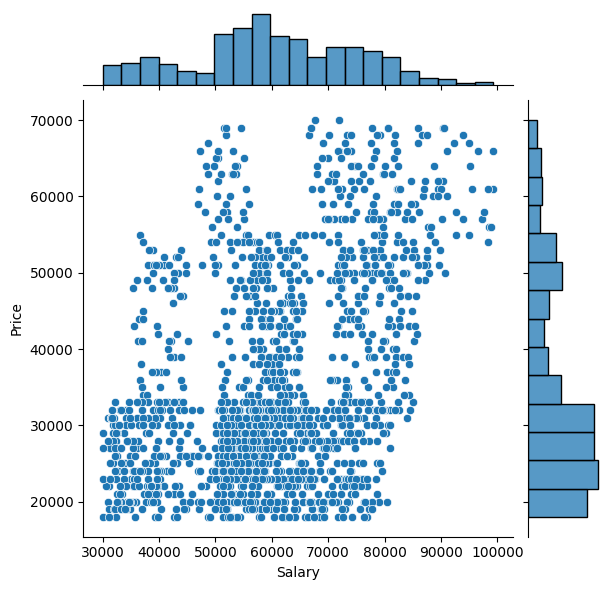

In [ ]:
sns.jointplot(data= df, x = "Salary", y = 'Price')

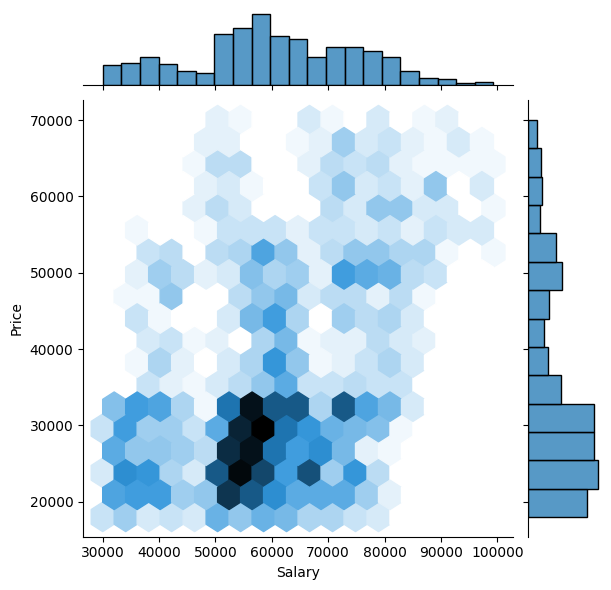

In [ ]:
sns.jointplot(data= df, x = "Salary", y = 'Price', kind = 'hex')

- The customers with the salary ranging betweeb 50000-60000 are more in number purchasing the cars of price ranging 20000-32000
- The customer earning morethan 80000 are purchasing the cars price ranging 50000-70000
-Otherwise, customers price range is noticed between 30000-50000

### Bivariate Analysis between `'Total_salary'` and `'Price'`

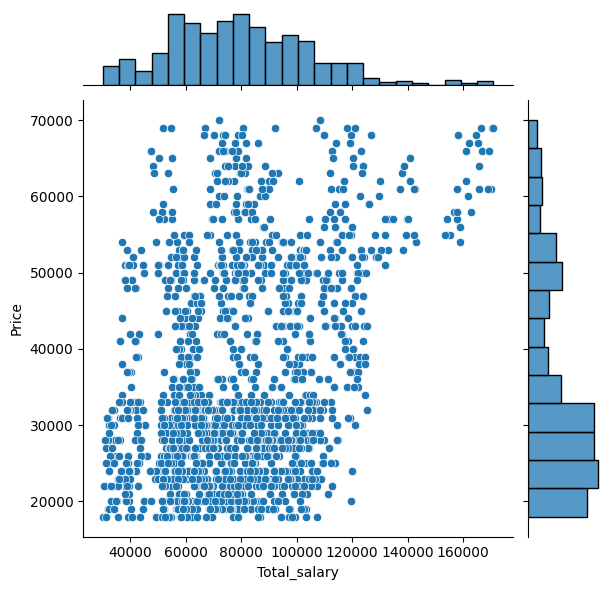

In [ ]:
sns.jointplot(data= df, x = "Total_salary", y = 'Price')

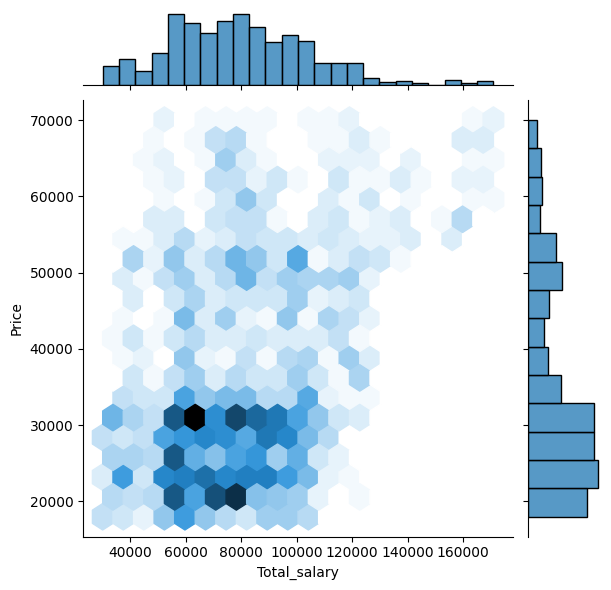

In [ ]:
sns.jointplot(data= df, x = "Total_salary", y = 'Price', kind = 'hex')

- Most of the customers are earning between 30000-100000 are purchasing the cars princing between 18000-35000 USD.
  - Especially the customers earning between 50000-60000 purchase cars between 60000-100000.
- The customer's salary above 120000-140000 are often purchasing the cars pricing between 45000-70000 USD.
- Clearly customers having the total salary more than 140000 purchases cars between 55000-70000
- There are few customers who are purchasing expensive cars at 70000 while having the Total_salary of 60000-80000.


### Bivariate Analysis between `'Partner_salary'` and `'Price'`

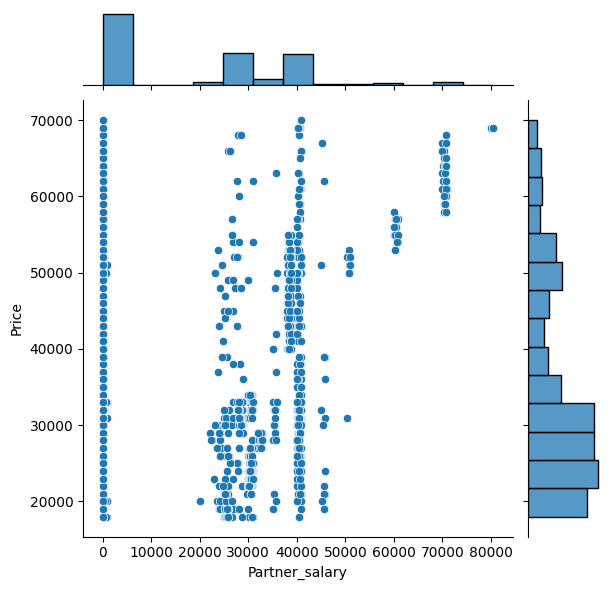

In [ ]:
sns.jointplot(data= df, x = "Partner_salary", y = 'Price')

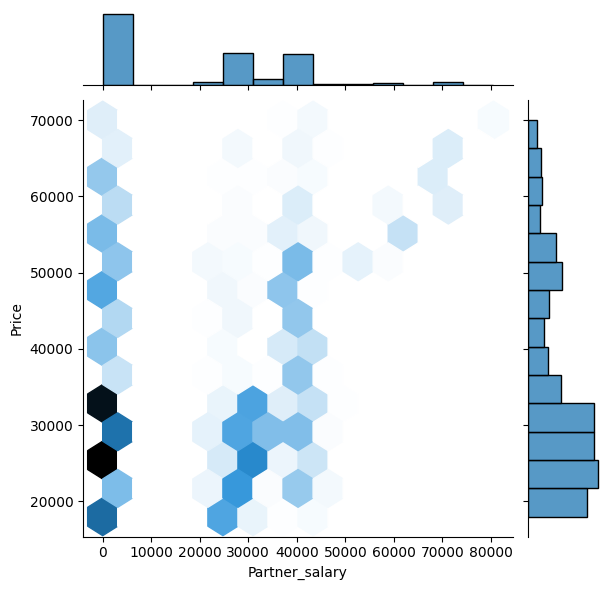

In [ ]:
sns.jointplot(data= df, x = "Partner_salary", y = 'Price', kind = 'hex')

- This graph shows even when the partner salary is less than 10000 the customers are still purchasing the cars at all prices.
- However, the most purchased cars between the price range of 25000-35000.
- If the Partner is earning between 20000 - 50000, the cars purchased often will be of the price 18000-35000. Yet it is still possible to say that there are customers buying cars pricing between 40000-70000.
- If the partner is earning more than 50000 it is clearly seen that the minimum cost of the car purchased is 55000.


### Bivariate Analysis between `'Partner_salary'` and `'Age'`

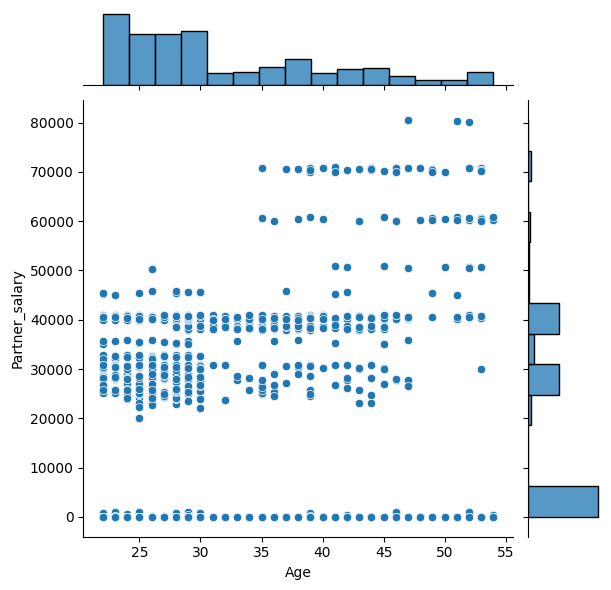

In [ ]:
sns.jointplot(data= df, x = "Age", y = 'Partner_salary')

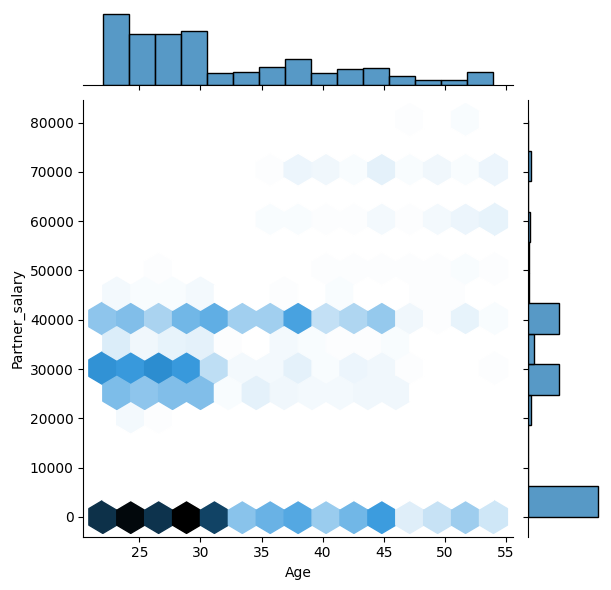

In [ ]:
sns.jointplot(data= df, x = "Age", y = 'Partner_salary', kind = 'hex')

- There is not a proper correlation between the Age of the customer and the Partner_salary.
- It is seen that customer of any age group has a partner who is earning and don't.
- Yet, we can notice that the partners earning salary between 20000-40000 are mostly in the age group of 20-35 (in the case of working partner).
- As the age of the customer is above 40 it is seen that the partner's salary is ranging between 20000-80000 (in the case of working partner). Mostly earned salary being 40000.

### Bivariate Analysis between `'Partner_salary'` and `'No_of_Dependents'`

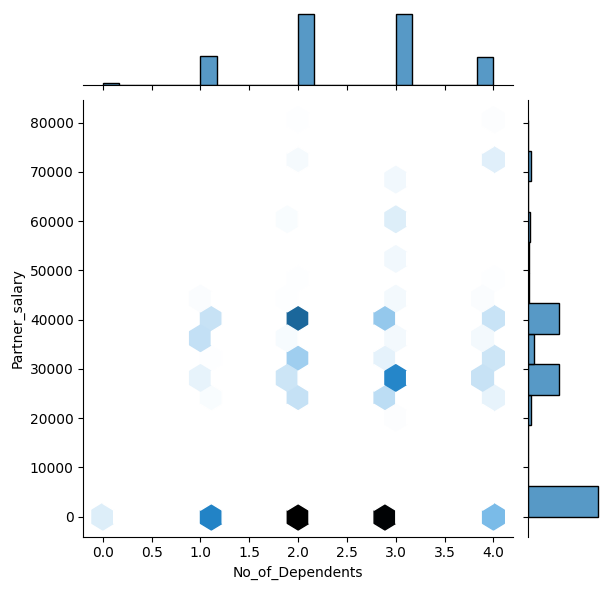

In [ ]:
sns.jointplot(data= df, x = "No_of_Dependents", y = 'Partner_salary', kind = 'hex')

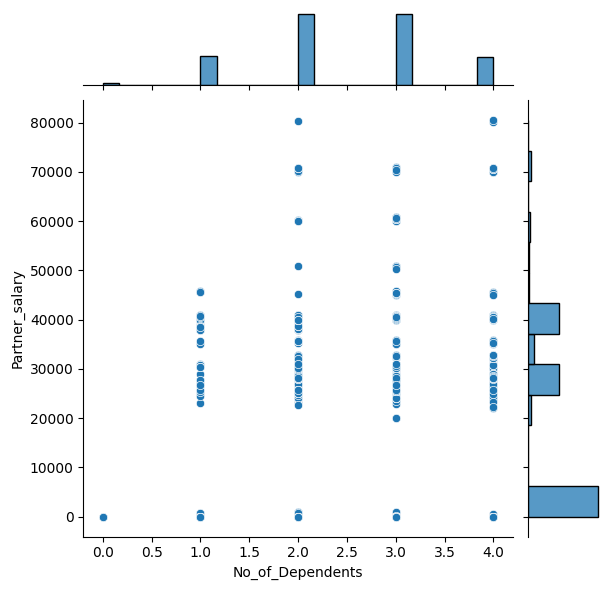

In [ ]:
sns.jointplot(data= df, x = "No_of_Dependents", y = 'Partner_salary')

<Axes: xlabel='No_of_Dependents', ylabel='Partner_salary'>

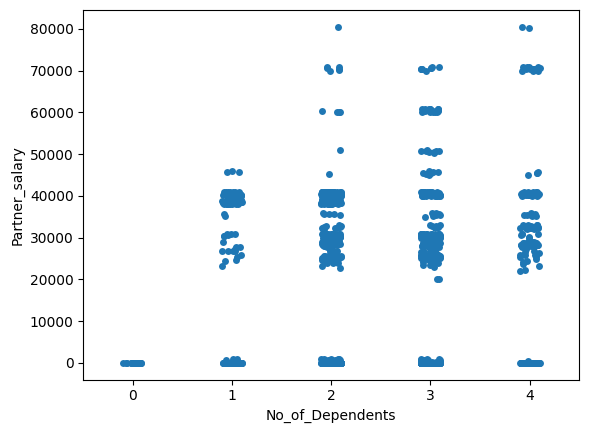

In [ ]:
sns.stripplot(data= df, x = "No_of_Dependents", y = 'Partner_salary')

<Axes: xlabel='No_of_Dependents', ylabel='Partner_salary'>

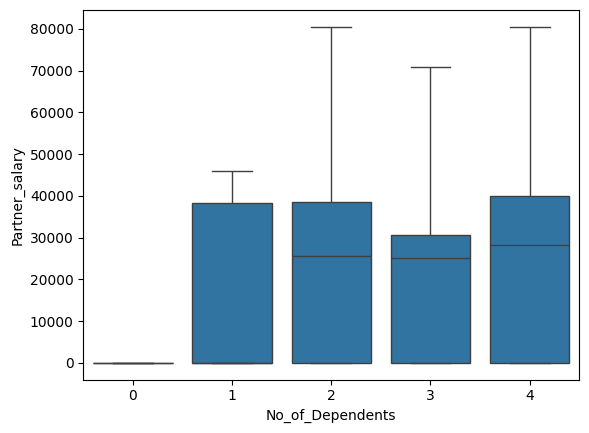

In [ ]:
sns.boxplot(data= df, x = "No_of_Dependents", y = 'Partner_salary')

- From the graphs we infer that partner is not working mostly when the **`dependnt value is 0`**.
- From the graphs we infer that the partner is either working with the maximum salary of 50000 or not working when the **`dependent value is 1`**.
   - In case of working partner the salary ranges between 20000-50000.
   - The mostly earned salary is 35000-40000.
- From the graphs we infer that the partner is either working with the maximum salary of 80000 or not working when the **`dependent value is 2`**.
   - In case of working partner the salary ranges between 20000-80000.
   - The mostly earned salary is 40000 and then follwed by the range of 20000-30000.
- From the graphs we infer that the partner is either working with the maximum salary of 70000 or not working when the **`dependent value is 3`**.
   - In case of working partner the salary ranges between 20000-70000.
   - The mostly earned salary is 25000-30000.
- From the graphs we infer that the partner is either working with the maximum salary of 80000 or not working when the **`dependent value is 4`**.
   - In case of working partner the salary ranges between 20000-80000.
   - The mostly earned salary is 20000-40000.

### Bivariate Analysis between `'Total_salary'` and `'No_of_Dependents'`

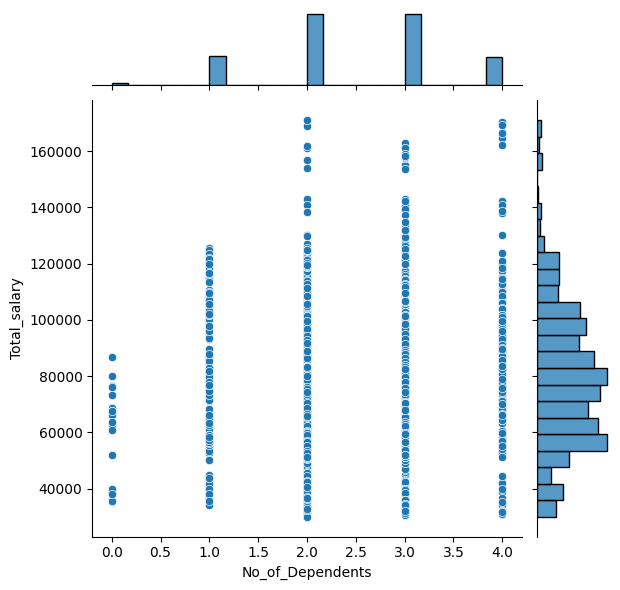

In [ ]:
sns.jointplot(data= df, x = "No_of_Dependents", y = 'Total_salary')

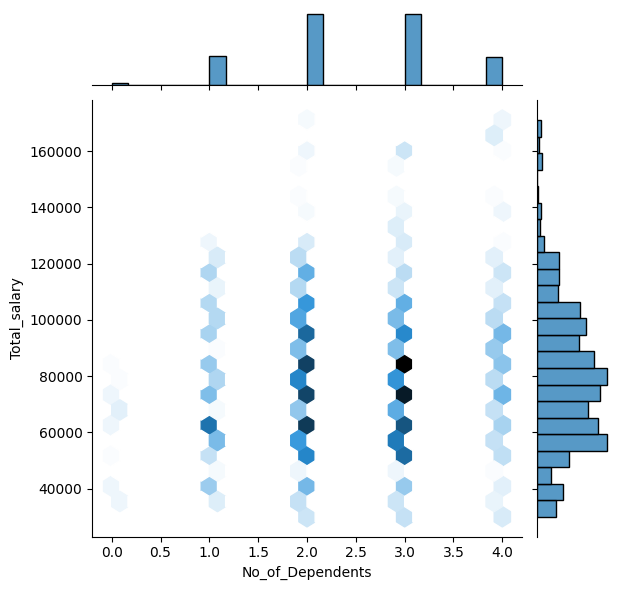

In [ ]:
sns.jointplot(data= df, x = "No_of_Dependents", y = 'Total_salary', kind = 'hex')

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

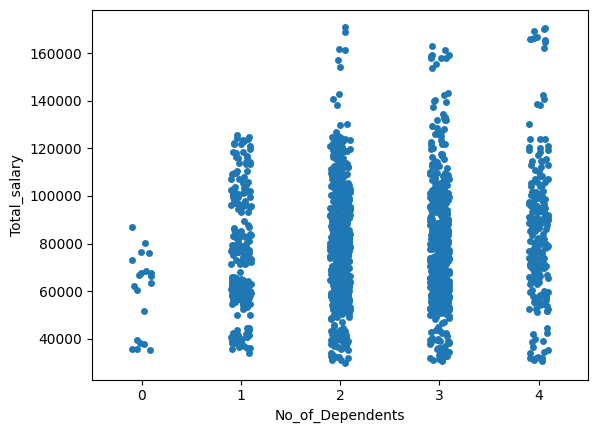

In [ ]:
sns.stripplot(data= df, x = "No_of_Dependents", y = 'Total_salary')

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

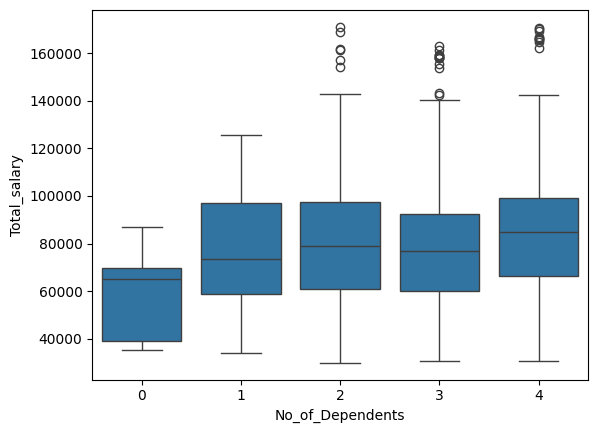

In [ ]:
sns.boxplot(data= df, x = "No_of_Dependents", y = 'Total_salary')

- The minimum Total_salary  30000.
- The customers with 0 dependants have the total salary ranging between 30000-90000. Where the median being 70000. These types of customers are less in number comapred to the others.
- The customers with 1 dependants earn between 30000-110000. Where the median is 75000.
- The customers with 2 dependants are high in number. They earn between 30000 and above 160000. The median being 80000. There are less number of customers who earn morethan 130000. Most of these customers earn between 50000-100000
- The customers with 3 dependants earn upto 160000.The median being 80000.
- The customers with 4 dependents earn upto 170000. Most of these customers earn between 50000-120000
-There are few outliers that is noticed from the graph, as it was mentioned before these are not the outliers but the actual values.

### Bivariate Analysis between `'Salary'` and `'Partner_salary'`

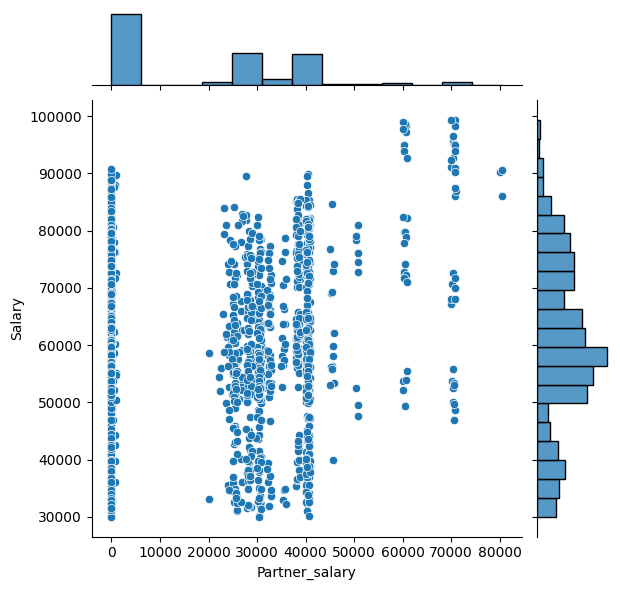

In [ ]:
sns.jointplot(data= df, x = "Partner_salary", y = 'Salary')

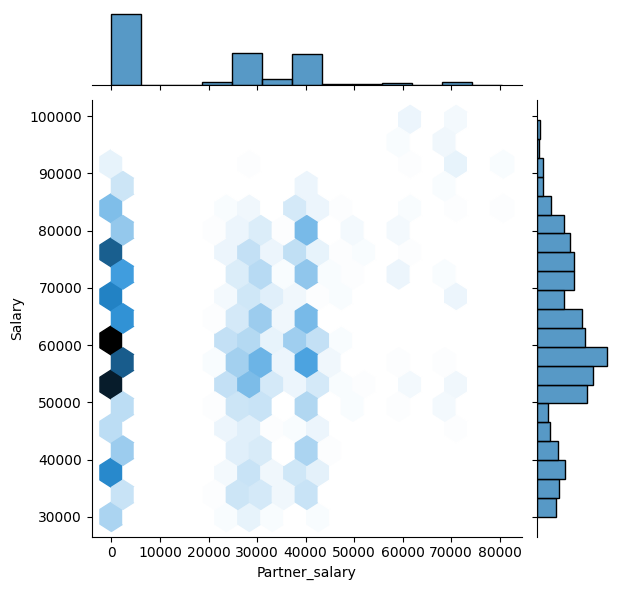

In [ ]:
sns.jointplot(data= df, x = "Partner_salary", y = 'Salary', kind = 'hex')

- Most of the customer's partner earn nothing among all the range of customer's salary.
- If the customer's partner is earning then the range would be between 20000-80000. However the partner's salary earned between 20000-50000 are in very high number compared to the partners earning morethan 50000.
- The parner' earning between 30000-40000 have the spouse salary between 50000-65000. These coordinates are high in number.
- The partner's earning more than 50000 have the spouse who earns minimum of 45000 and goes upto 100000.

### Bivariate Analysis between `'Salary'` and `'No_of_Dependents'`

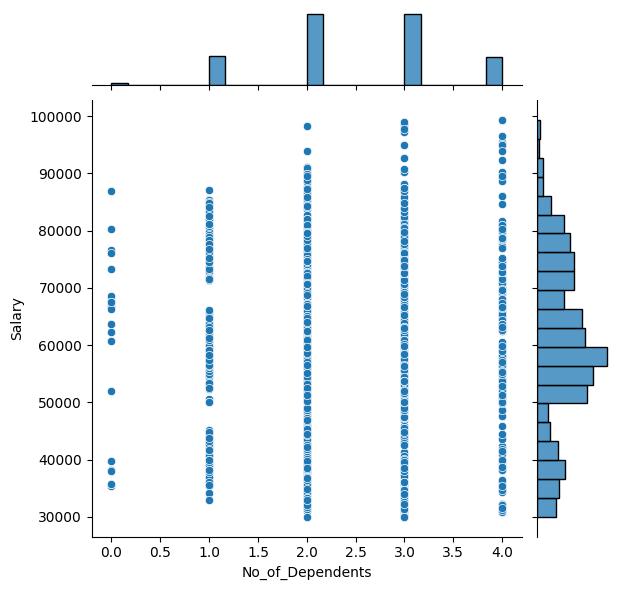

In [ ]:
sns.jointplot(data = df, x = 'No_of_Dependents', y = 'Salary')

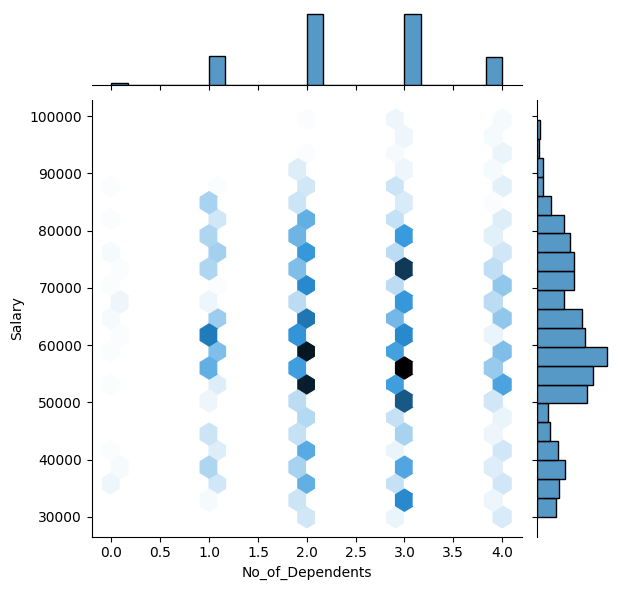

In [ ]:
sns.jointplot(data = df, x = 'No_of_Dependents', y = 'Salary', kind = 'hex')

<Axes: xlabel='No_of_Dependents', ylabel='Salary'>

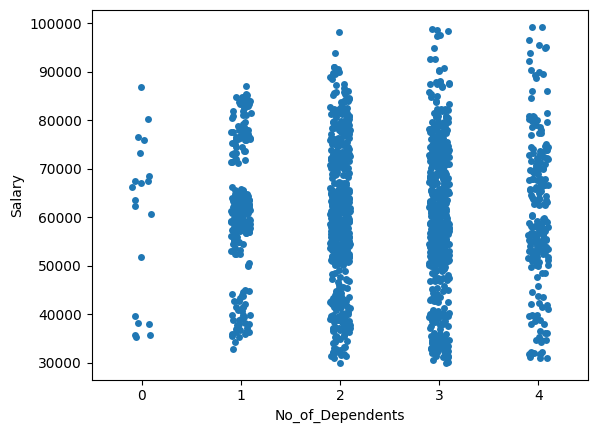

In [ ]:
sns.stripplot(data = df, x = 'No_of_Dependents', y = 'Salary')

<Axes: xlabel='No_of_Dependents', ylabel='Salary'>

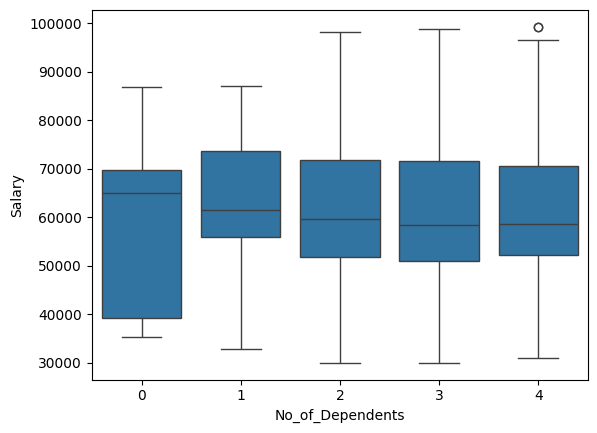

In [ ]:
sns.boxplot(data = df, x = 'No_of_Dependents', y = 'Salary')

- The customers with 0 dependents earns between 35000-85000. Median being 65000.
- The customers with 1 dependent earns between 35000-85000.Median being 60000.
- The customers with 2 dependent earns between 30000-100000.Median being 60000.
- The customers with 3 dependent earns between 30000-100000.Median being 60000.
- The customers with 4 dependent earns between 30000-100000.Median being 60000.
- **It clearly seen that the customer's salary is not affected by the No_of_dependents.**

### Bivariate Analysis between `'Price'` and `'No_of_Dependents'`

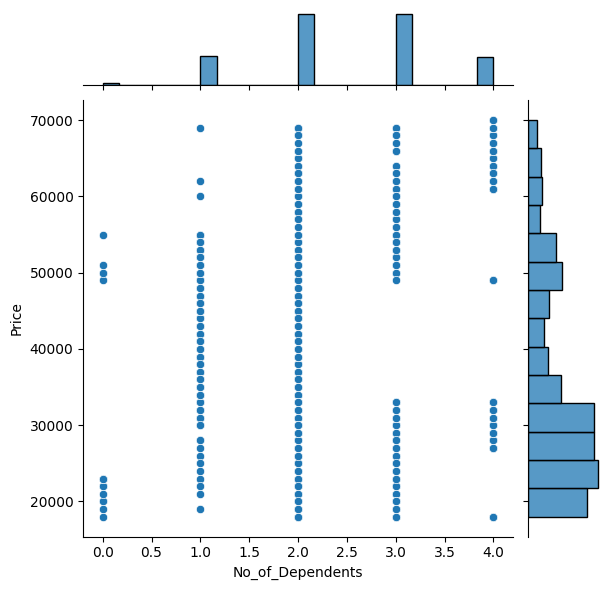

In [ ]:
sns.jointplot(data = df, x = 'No_of_Dependents', y = 'Price')

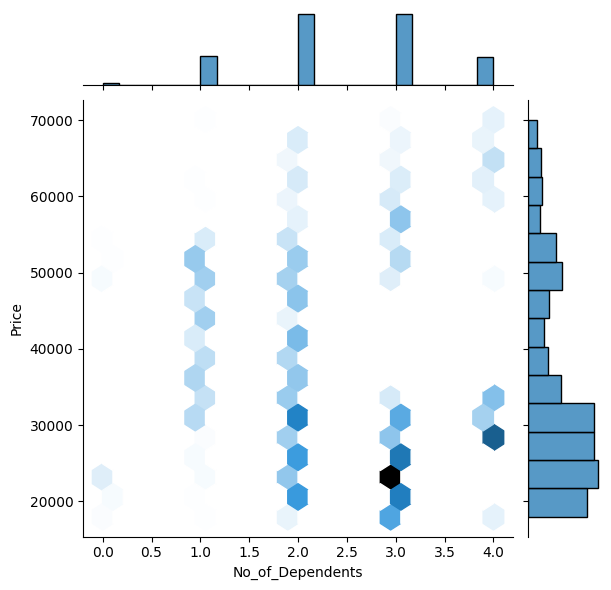

In [ ]:
sns.jointplot(data = df, x = 'No_of_Dependents', y = 'Price', kind = 'hex')

<Axes: xlabel='No_of_Dependents', ylabel='Price'>

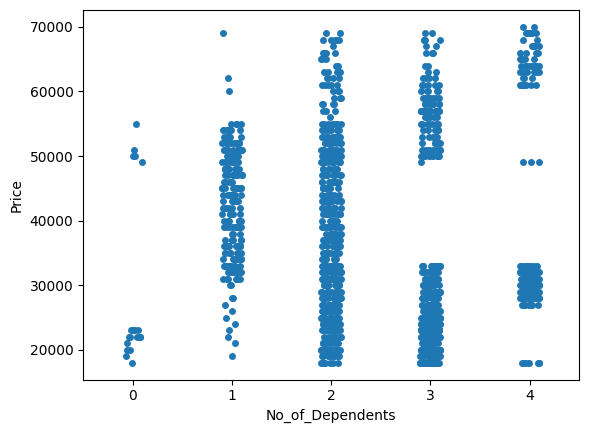

In [ ]:
sns.stripplot(data = df, x = 'No_of_Dependents', y = 'Price')

<Axes: xlabel='No_of_Dependents', ylabel='Price'>

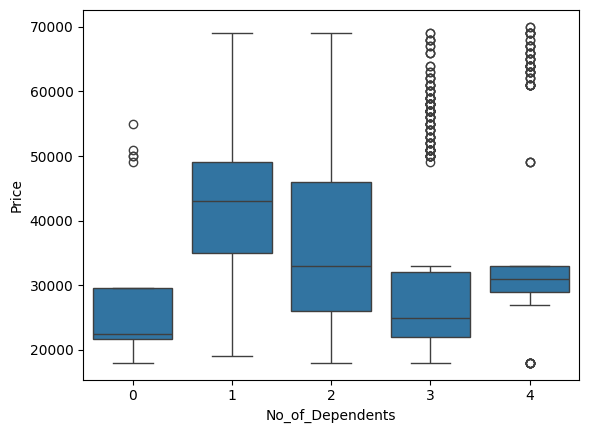

In [ ]:
sns.boxplot(data = df, x = 'No_of_Dependents', y = 'Price')

- The customers with 0 dependents purchase cars between 20000-30000. where median being less than 25000. However, there are few customers who has purchased cars between 48000-55000.
- The customers with 1 dependent has purchased cars at all prices where the median being 45000.
- The customers with 2 dependent has purchased cars at all prices where the median being 35000.
- The customers with 3 dependent has purchased cars often purchase cars between 20000-35000. Or they have purchased cars pricing betwen 50000-70000.
- The customers with 4 dependent has purchased cars often purchase cars between 30000-35000. Or they have purchased cars pricing betwen 60000-70000. And there is a customer purchasing at price 50000 and 20000, mostly this is not the case that could be considered.


### Bivariate Analysis between `'Age'` and `'No_of_Dependents'`

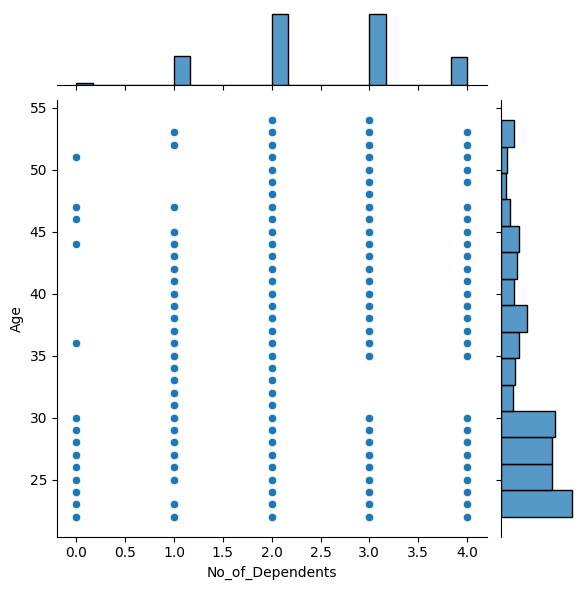

In [ ]:
sns.jointplot(data = df, x = 'No_of_Dependents', y = 'Age')

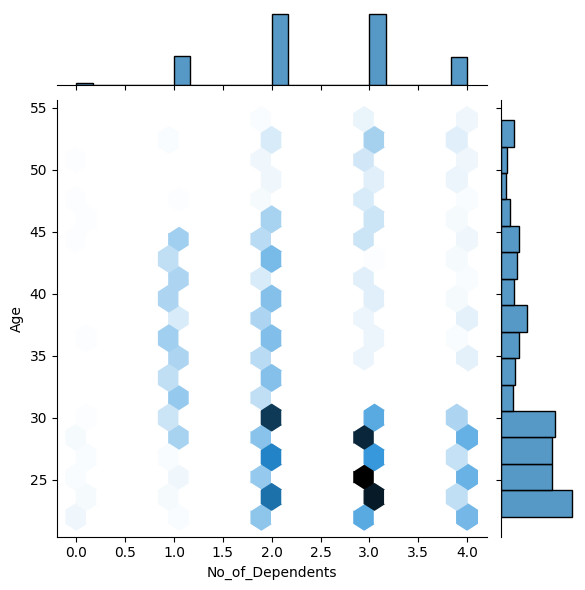

In [ ]:
sns.jointplot(data = df, x = 'No_of_Dependents', y = 'Age', kind = 'hex')

<Axes: xlabel='No_of_Dependents', ylabel='Age'>

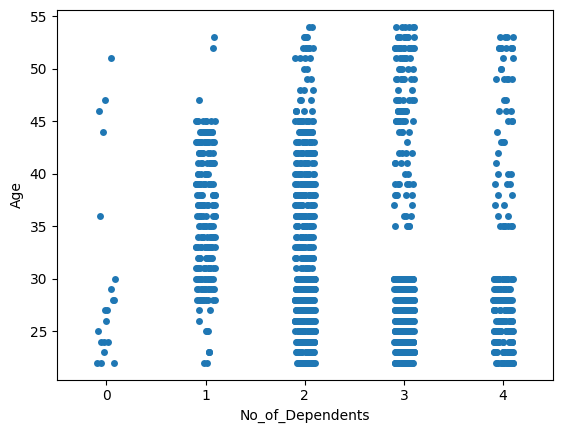

In [ ]:
sns.stripplot(data = df, x = 'No_of_Dependents', y = 'Age')

<Axes: xlabel='No_of_Dependents', ylabel='Age'>

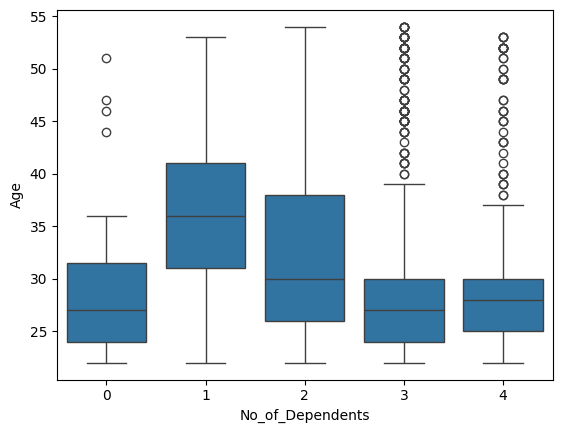

In [ ]:
sns.boxplot(data = df, x = 'No_of_Dependents', y = 'Age')

In [ ]:
df[df['No_of_Dependents']>=3]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0      53    Male   Business        Married  Post Graduate                 4   
1      53  Female   Salaried        Married  Post Graduate                 4   
2      53  Female   Salaried        Married  Post Graduate                 3   
4      53    Male   Salaried        Married  Post Graduate                 3   
5      53  Female   Salaried        Married  Post Graduate                 3   
...   ...     ...        ...            ...            ...               ...   
1574   22    Male   Salaried        Married       Graduate                 3   
1575   22    Male   Salaried        Married       Graduate                 3   
1577   22    Male   Business        Married       Graduate                 4   
1579   22    Male   Business        Married       Graduate                 3   
1580   22    Male   Salaried        Married       Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0               No         No             Yes   99300           70700   
1              Yes         No             Yes   95500           70300   
2               No         No             Yes   97300           60700   
4               No         No             Yes   79700           60200   
5               No         No             Yes   79800           60500   
...            ...        ...             ...     ...             ...   
1574           Yes        Yes              No   34700               0   
1575           Yes         No              No   34000               0   
1577            No         No              No   32000               0   
1579           Yes        Yes              No   32200               0   
1580            No         No              No   31600               0   

      Total_salary  Price       Make  
0           170000  61000        SUV  
1           165800  61000        SUV  
2           158000  57000        SUV  
4           139900  57000        SUV  
5           140300  57000        SUV  
...            ...    ...        ...  
1574         34700  20000      Sedan  
1575         34000  19000  Hatchback  
1577         32000  31000  Hatchback  
1579         32200  24000  Hatchback  
1580         31600  31000  Hatchback  

[775 rows x 14 columns]

- The customers aging between 20-30 mostly have either 3 or 2 dependents.
- The customers aging between 30-40 mostly either 2 or 3 dependents.
- The customers aging between 45 and above it is mostly 3 or 4 dependents dependents.
- There are outliers that is seen in the box plot, yet these points being valid data points.

**However the graphs shows the no of dependents being anywhere between 0-4 accross all age group**

### Pair Plot between numerical variables

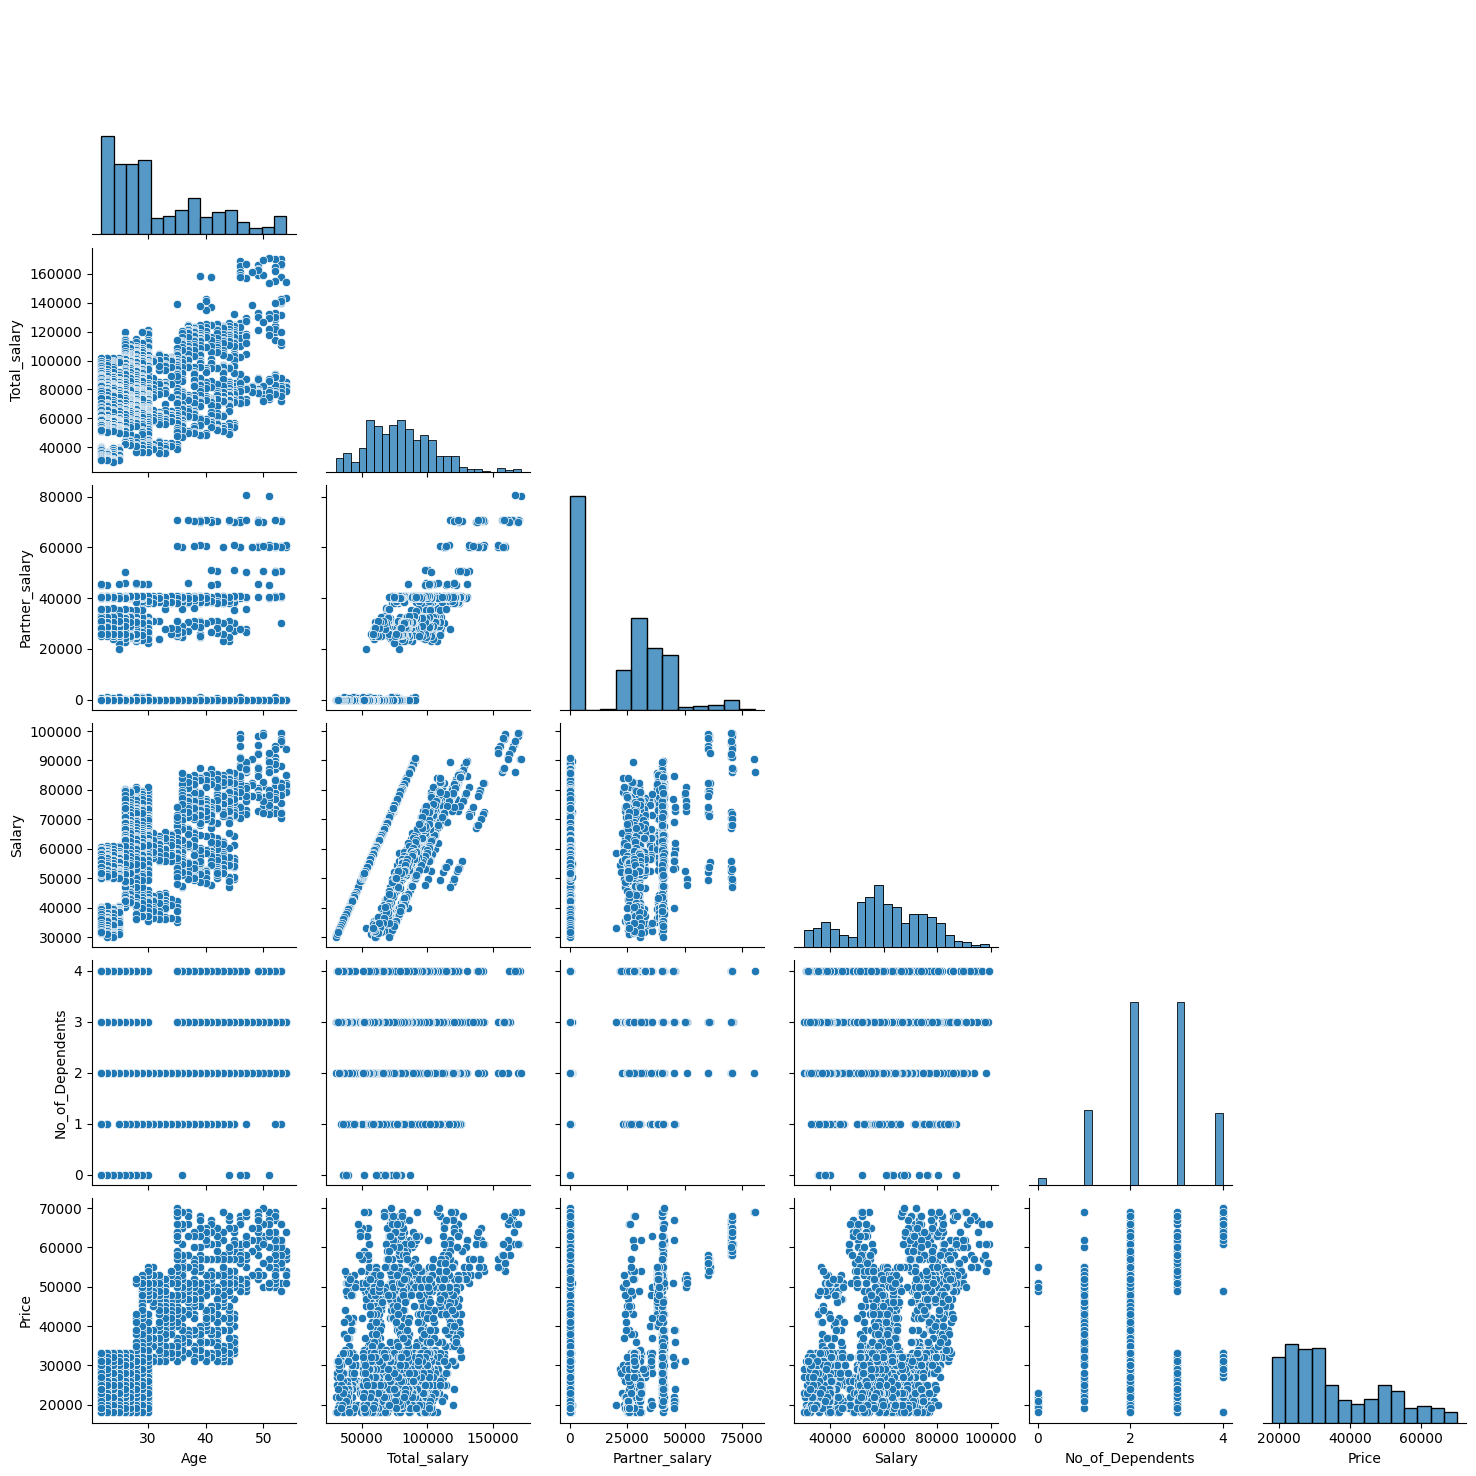

In [ ]:
sns.pairplot(data = df[['Age', 'Total_salary', 'Partner_salary','Salary', 'No_of_Dependents', 'Price']], corner = True)

### The correlation between all numerical variables

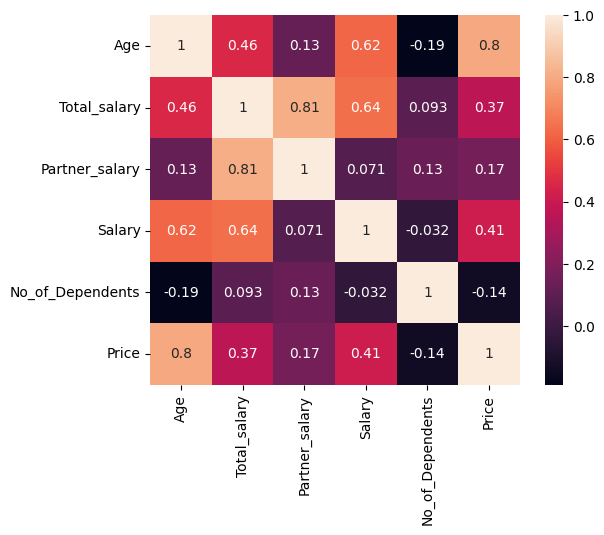

In [ ]:
sns.heatmap(data= df[['Age','Total_salary', 'Partner_salary','Salary', 'No_of_Dependents', 'Price']].corr(), annot=True, square = True);

**Observations:**

- **Highly correlated** values are `Partner_salary` and `Total_salary` with `0.81`.
-  `'Age'` and `'Price'` have the correlation of `0.8`.
- `'Salary'` and `'Total_salary'` have the correlation of `0.64`.
- `'Salary'` and `'Age'` have the correlation of `0.62`.
- `'Total_salary'` and `'Age'` have the correlation of `0.46`.
- `'Salary'` and `'Price'` have the correlation of `0.41`.
- `'Total_salary'` and `'Price'` have the correlation of `0.37`.
- `'Partner_salary'` and `'Price'` have the correlation of `0.17`.
- `'Partner_salary'` and `'Age'` have the correlation of `0.13`.
- `'Partner_salary'` and `'No_of_Dependents'` have the correlation of `0.13`.
- `'Total_salary'` and `'No_of_Dependents'` have the correlation of `0.093`.
- `'Salary'` and `'Partner_salary'` have the correlation of `0.071`.
- `'Salary'` and `'No_of_Dependents'` have the correlation of `-0.032`.
- `'Price'` and `'No_of_Dependents'` have the correlation of `-0.14`.
- **Least correlated** values are `'Age'` and `'No_of_Dependents'` have the correlation of `-0.19`.

### Relationship between categorical vs numerical variables

In [ ]:
df.head(2)

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300           70700   
1           Yes         No             Yes   95500           70300   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV

#### Relationship between `'Gender'`, `'Salary'` and `'Marital_status'`

<Axes: xlabel='Gender', ylabel='Salary'>

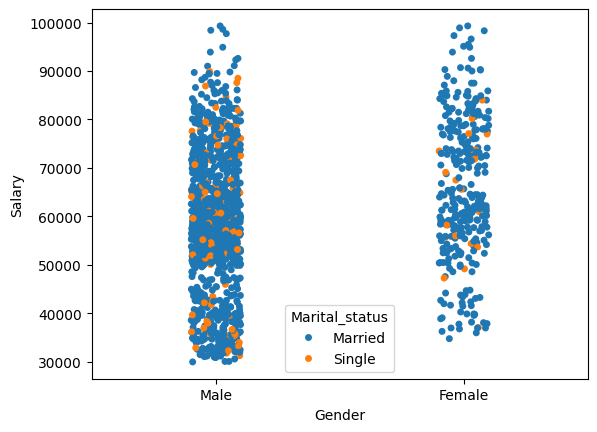

In [ ]:
sns.stripplot(data=df, x='Gender', y='Salary' , hue = 'Marital_status')

<Axes: xlabel='Gender', ylabel='Salary'>

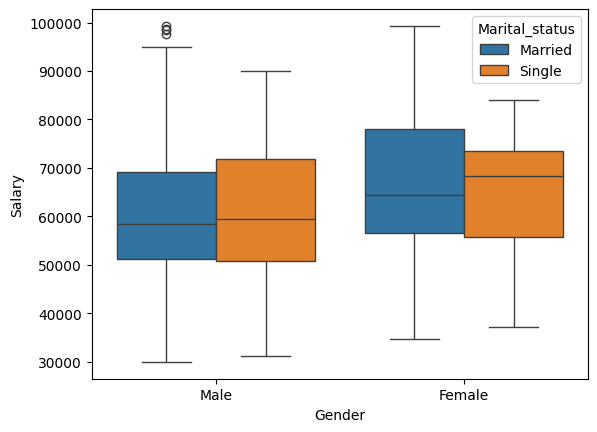

In [ ]:
sns.boxplot(data=df, x='Gender', y='Salary' , hue = 'Marital_status')

The above graphs shows the relationship between `'Gender'`, `'Salary'` and `'Marital_status'`

- Married men are earning between 30000-100000 where the median being 58000.
- Single men are earning between 30000-90000 where the median being 60000.
- Married women are earning between 30000-100000 where the median being 65000.
- Single women are earning between 35000-85000 where the median being 68000.

From the scatter plot we can observe that the majority of the customers are married.

#### Relationship between `'Total_salary'`, `'Gender'` and `'Marital_status'`


<Axes: xlabel='Gender', ylabel='Total_salary'>

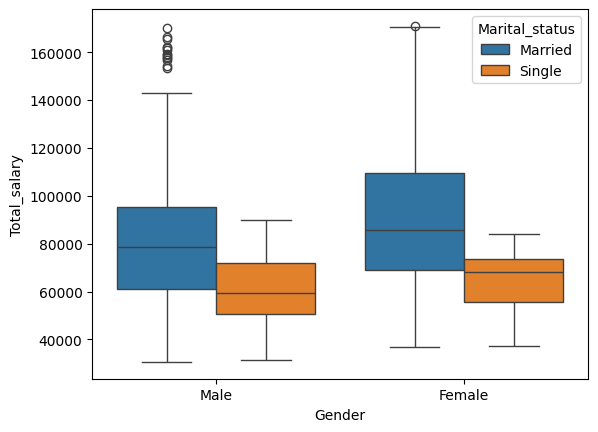

In [ ]:
sns.boxplot(data=df, x='Gender', y='Total_salary' , hue = 'Marital_status')

<Axes: xlabel='Gender', ylabel='Total_salary'>

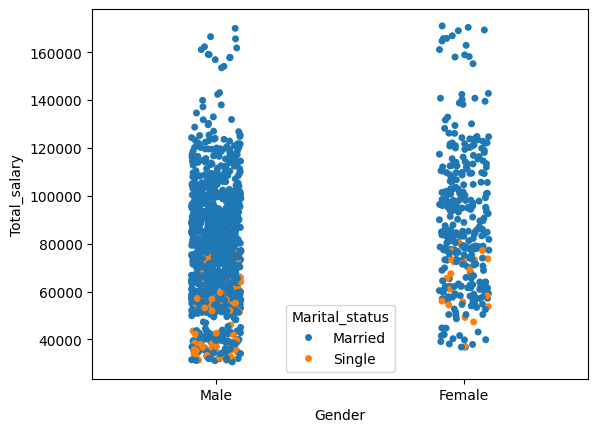

In [ ]:
sns.stripplot(data=df, x='Gender', y='Total_salary' , hue = 'Marital_status')

The above graphs shows the relationship between `'Total_salary'`, `'Gender'` and `'Marital_status'`

- The married men have the total salary ranging between 30000-170000 and median being 79000.
- The single men have the total salary ranging between 30000-90000 and median being 60000.
- The married men have the total salary ranging between 30000-170000 and median being 80000.
- The single men have the total salary ranging between 30000-90000 and median being 65000.


#### Relationship between `'Gender'`,`'Price'` and `'Make'`

<Axes: xlabel='Gender', ylabel='Price'>

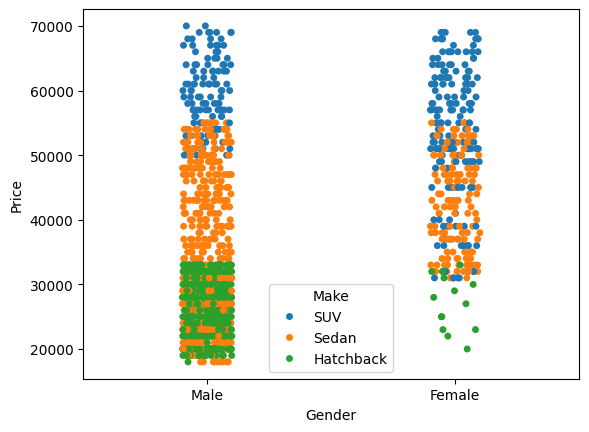

In [ ]:
sns.stripplot(data=df, x='Gender', y='Price', hue = 'Make')

<Axes: xlabel='Gender', ylabel='Price'>

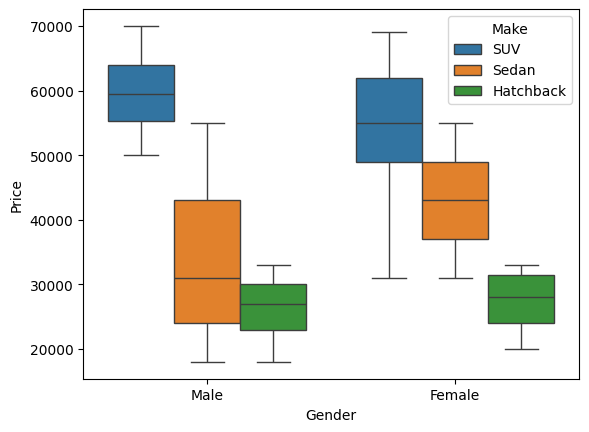

In [ ]:
sns.boxplot(data=df, x='Gender', y='Price', hue = 'Make')

The above graphs shows the relationship between `'Gender'`,`'Price'` and `'Make'`

- We notice that the price of Hatchback is the least ranging between 18000-30000 and the median price being 25000.
- Number of females purchasing hatchbcak is extremely low compared to other models.
- The males purchasing sedan is very high in number, the price ranging between 18000-55000 and median 30000.
- The females purchasing sedan in the range between 35000-55000 and median being 45000.
- The males purchasing SUVs are in the pricing range of 50000-70000 and median being 60000.
- The females purchasing SUVs are in the price range of 35000-70000 and median being 55000.


#### Relationship between `'Gender'`, `'Total_salary'` and `'Make'`

<Axes: xlabel='Gender', ylabel='Total_salary'>

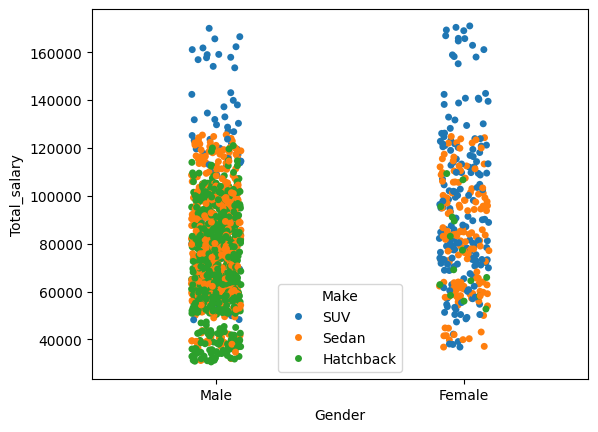

In [ ]:
sns.stripplot(data=df, x='Gender', y='Total_salary', hue = 'Make')

<Axes: xlabel='Gender', ylabel='Total_salary'>

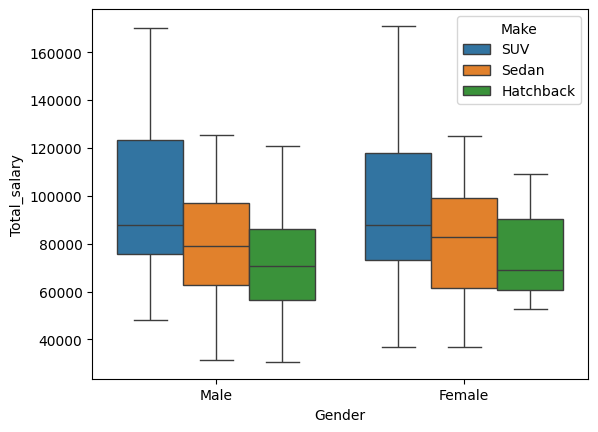

In [ ]:
sns.boxplot(data=df, x='Gender', y='Total_salary', hue = 'Make')

In [ ]:
df[df['Gender']=='Female'].groupby('Make').size()

Make
Hatchback     15
SUV          173
Sedan        141
dtype: int64

In [ ]:
df[df['Gender']=='Male'].groupby('Make').size()

Make
Hatchback    565
SUV          118
Sedan        516
dtype: int64

**Females**
- The number customers for Hatchback is less compared to other models and the total salary range is between 50000-110000 and mdeian being 70000.
- The second most bought cars by the females are Sedan and their Total salary is ranging between 40000-110000 and median is 80000.
- The most bought cars are SUVs and their total salary is between 40000-170000 median is 90000.

**Males**
- The least bought cars are SUV where there total sslary is in the range of 50000-17000.
- The second most bought cars are Sedan where their total salary is in the range between 20000-120000 median is 90000.
- The most bought cars are Hatchback where their total salary is between 20000-120000 median is 70000.

#### Relationship between `'No_of_Dependents'`, `'Total_salary'`, `'Make'` and `'Partner_working'`

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

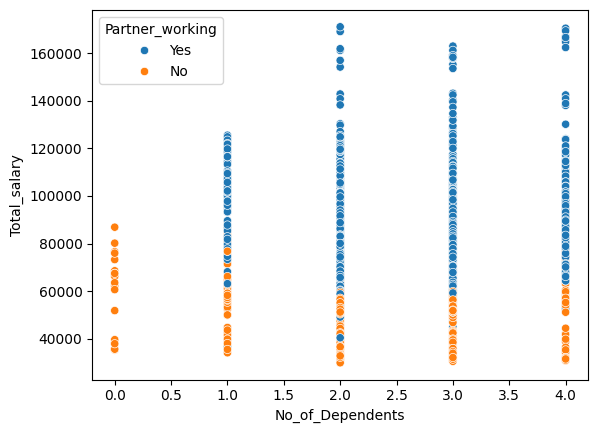

In [ ]:
sns.scatterplot(data=df, x='No_of_Dependents', y='Total_salary', hue = 'Partner_working')

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

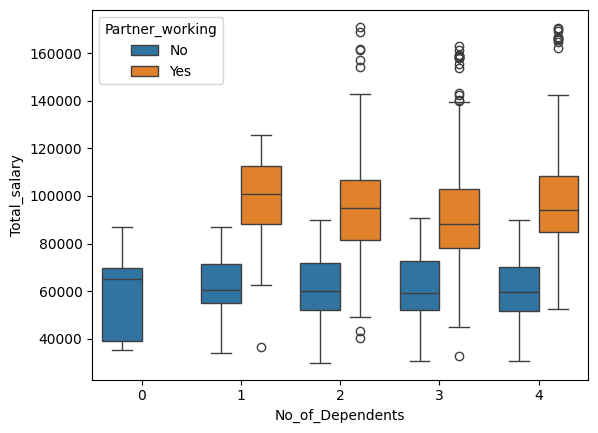

In [ ]:
sns.boxplot(data=df, x='No_of_Dependents', y='Total_salary', hue = 'Partner_working')

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

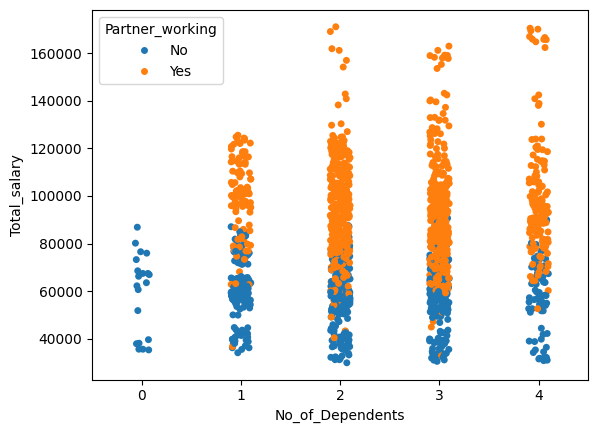

In [ ]:
sns.stripplot(data=df, x='No_of_Dependents', y='Total_salary', hue = 'Partner_working')

<Axes: xlabel='Total_salary', ylabel='No_of_Dependents'>

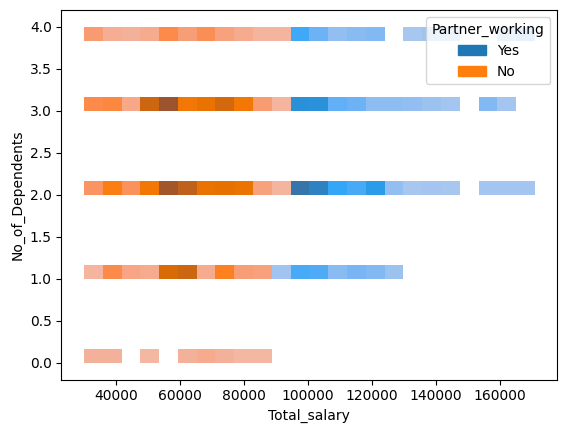

In [ ]:
sns.histplot(data=df, y='No_of_Dependents', x='Total_salary', hue = 'Partner_working', kde = True)

- The customers with 0 dependents are the sole earners.
- If the partner `is not working` the minimum total salary of a customers will be ranging between 20000-90000 for any number of dependents between 0-4. The median is comparetively high for 0 dependednts which is around 70000.
- If the partner `is working` the minimum total salary of a customers will be ranging between 50000-170000 for any number of dependents between 1-4. The median is comparetively high for 1 dependednts which is around 100000.

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

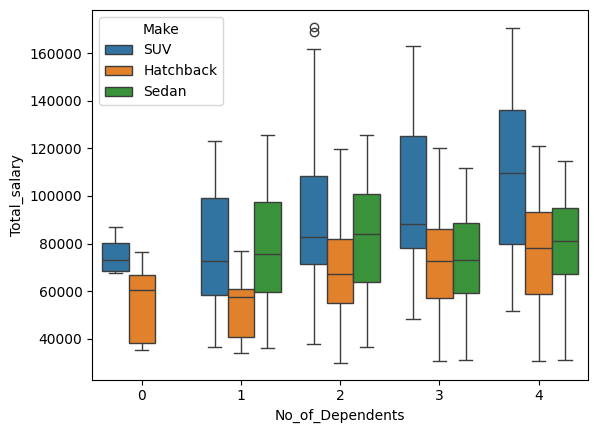

In [ ]:
sns.boxplot(data=df, x='No_of_Dependents', y='Total_salary', hue = 'Make')

**- The customers with 0 dependents don't prefer Sedan**

<Axes: xlabel='No_of_Dependents', ylabel='Total_salary'>

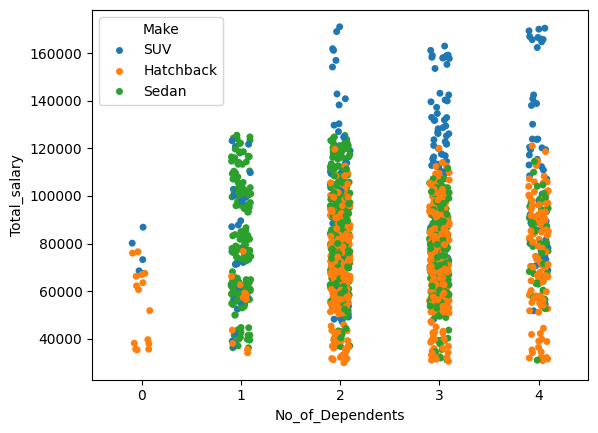

In [ ]:
sns.stripplot(data=df, x='No_of_Dependents', y='Total_salary', hue = 'Make')

- Hatchback are most commonly prefered cars by the customers with 2 or 3 dependents irrespective of partner's working status.
- Sedan are mostly prefered by customers with 1 dependent irrespective of partner's working status.

In [ ]:
df[df['Partner_working']=='No'].groupby('Make').size()

Make
Hatchback    281
SUV          144
Sedan        288
dtype: int64

In [ ]:
temp = df[df['Partner_working']=='Yes']
temp[temp['No_of_Dependents']==4].groupby('Make').size()

Make
Hatchback    75
SUV          36
Sedan        30
dtype: int64

#### Relationship between `'House_loan'`, `'Total_salary'` and `'Make'`

<Axes: xlabel='House_loan', ylabel='Total_salary'>

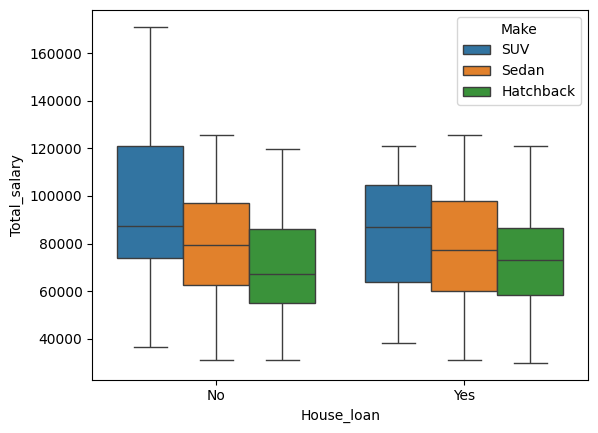

In [ ]:
sns.boxplot(data=df, x='House_loan', y='Total_salary', hue = 'Make')

<Axes: xlabel='House_loan', ylabel='Total_salary'>

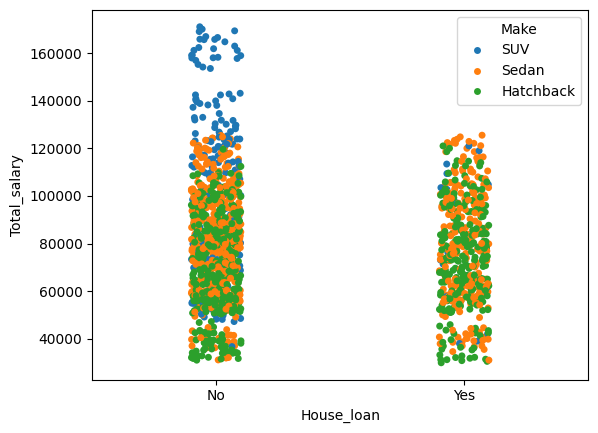

In [ ]:
sns.stripplot(data=df, x='House_loan', y='Total_salary', hue = 'Make')

In [ ]:
df[df['House_loan']=='Yes'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    14.864010
SUV           1.391524
Sedan        17.077799
dtype: float64

In [ ]:
df[df['House_loan']=='No'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    21.948134
SUV          17.394054
Sedan        27.324478
dtype: float64

In [ ]:
df['House_loan'].value_counts(normalize=True)

House_loan
No     0.666667
Yes    0.333333
Name: proportion, dtype: float64

**House loans = NO**
- These customers are around 66.6%
- The customers (around 17% in total customers) are purchasing the high end cars like SUVs where the median is 90000.
- The maximum Total salary of these customers has been 170000.

**House loans = YES**
- These customers are around 33.3%
- These customers perfer Sedan and then follwed by Hatchback.
- only 1% of these customers buy SUVs.
- The maximum Total salary of these customers has been 120000.


#### Relationship between `'Personal_loan'`, `'Total_salary'` and `'Make'`

<Axes: xlabel='Personal_loan', ylabel='Total_salary'>

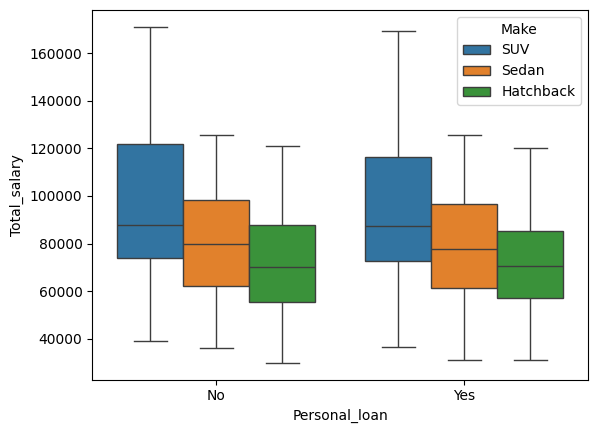

In [ ]:
sns.boxplot(data=df, x='Personal_loan', y='Total_salary', hue = 'Make')

<Axes: xlabel='Personal_loan', ylabel='Total_salary'>

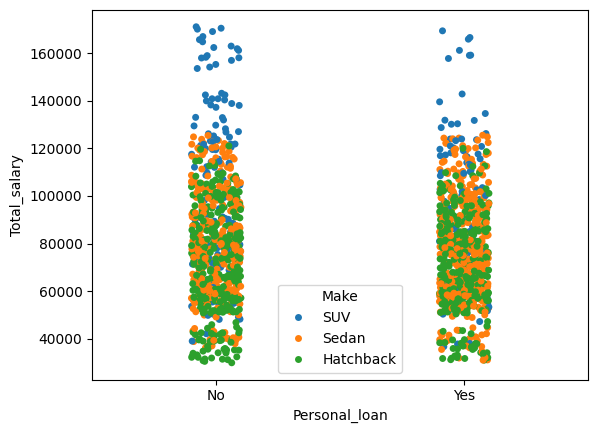

In [ ]:
sns.stripplot(data=df, x='Personal_loan', y='Total_salary', hue = 'Make')

In [ ]:
df[df['Personal_loan']=='Yes'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    18.406072
SUV           7.337128
Sedan        24.351676
dtype: float64

In [ ]:
df[df['Personal_loan']=='No'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    18.406072
SUV          11.448450
Sedan        20.050601
dtype: float64

In [ ]:
df['Personal_loan'].value_counts(normalize=True)

Personal_loan
Yes    0.500949
No     0.499051
Name: proportion, dtype: float64

Almost 50% of customers have personal loans.

**Personal_loan = No**
- These customers mostly prefer sedan and followed by hatchback.

**Personal_loan = No**
- These customers mostly prefer sedan and followed by hatchback.
- However 11% of these customers buy SUVs


#### Relationship between `'Marital_status'`, `'Make'`, `'Total_salary'`

<Axes: xlabel='Make', ylabel='Total_salary'>

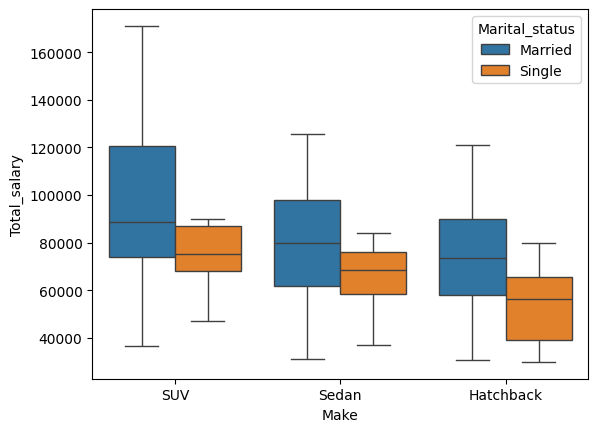

In [ ]:
sns.boxplot(data=df, x='Make', y='Total_salary', hue = 'Marital_status')

<Axes: xlabel='Make', ylabel='Total_salary'>

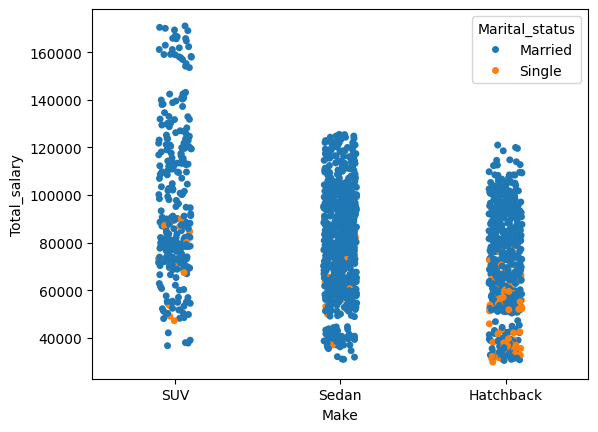

In [ ]:
sns.stripplot(data=df, x='Make', y='Total_salary', hue = 'Marital_status')

In [ ]:
df[df['Marital_status']=='Married'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    31.499051
SUV          17.773561
Sedan        41.998735
dtype: float64

In [ ]:
df[df['Marital_status']=='Single'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    5.313093
SUV          1.012018
Sedan        2.403542
dtype: float64

- Most prefered cars by single customers are hatchback. Where as for Married it is sedan.

## Key Questions Answered

### 1. Do men tend to prefer SUVs more compared to women?

<Axes: xlabel='Make', ylabel='count'>

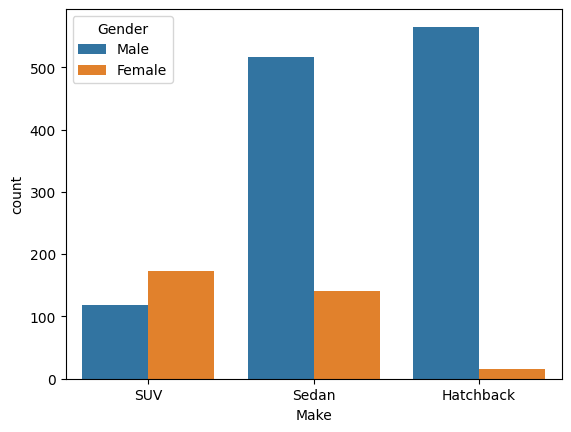

In [ ]:
sns.countplot(data = df, x ='Make' , hue = 'Gender')

<Axes: xlabel='Gender', ylabel='count'>

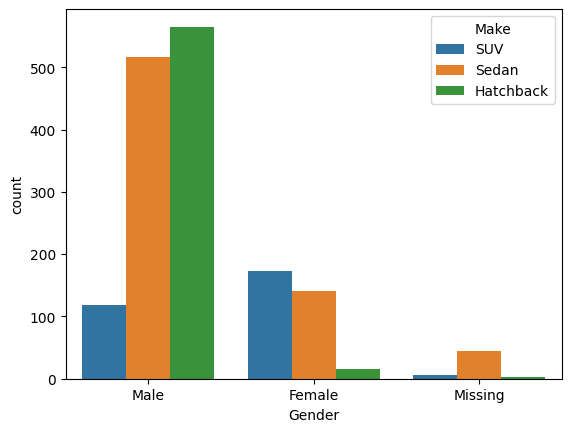

In [ ]:
sns.countplot(data=df.fillna('Missing'), x='Gender', hue='Make')

In [ ]:
male_car_count = df[df['Gender'] == 'Male'].groupby('Make').size()
male_car_count['SUV']

118

In [ ]:
male_car_count

Make
Hatchback    565
SUV          118
Sedan        516
dtype: int64

In [ ]:
female_car_count = df[df['Gender'] == 'Female'].groupby('Make').size()
female_car_count['SUV']

173

In [ ]:
female_car_count

Make
Hatchback     15
SUV          173
Sedan        141
dtype: int64

In [ ]:
# Create a temporary view of the dataset with 'Missing' filled in for the Gender column
temp_df = df.copy()
temp_df['Gender'] = temp_df['Gender'].fillna('Missing')

Missing_car_count = temp_df[temp_df['Gender'] == 'Missing'].groupby('Make').size()
Missing_car_count['SUV']


6

In [ ]:
Missing_car_count

Make
Hatchback     2
SUV           6
Sedan        45
dtype: int64

From the first graph and the second graph we clearly notice that **`women (Count = 173)`** have purchased more SUVs compared to **`men (Count = 118)`**.

However, even if we consider the missing values of Gender to be `'Male'` it still cannot match the number female customers for SUVs.

**`Missing_car_count['SUV'] = 6`**

**Hence, men don't prefer SUVs comapred to women.**

### 2. What is the likelihood of a salaried person buying a Sedan?

<Axes: xlabel='Profession', ylabel='count'>

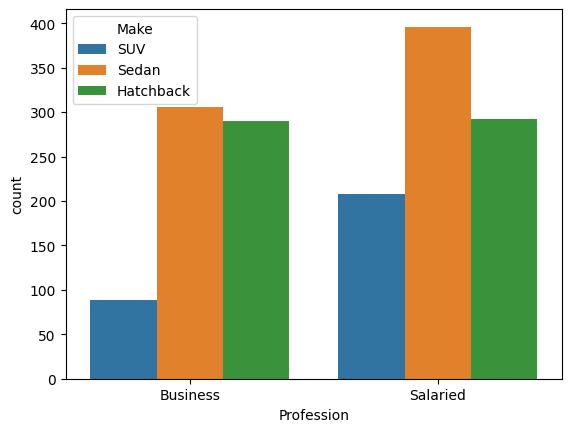

In [ ]:
sns.countplot(data = df, x = 'Profession', hue = 'Make')

In [ ]:
salaried_people_car = df[df['Profession']=='Salaried'].groupby('Make').size()

In [ ]:
salaried_people_car

Make
Hatchback    292
SUV          208
Sedan        396
dtype: int64

In [ ]:
salaried_people_car/1581*100

Make
Hatchback    18.469323
SUV          13.156230
Sedan        25.047438
dtype: float64

From the above graphs and the calculations we notice that out of 1581 customers 393 have purchased Sedan at 25%.

Hatchback at 18.4% and SUV at 13.1%

**Therefore, we can conculde that salaried person most likely to buy Sedan with a probablity of 25%**

### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

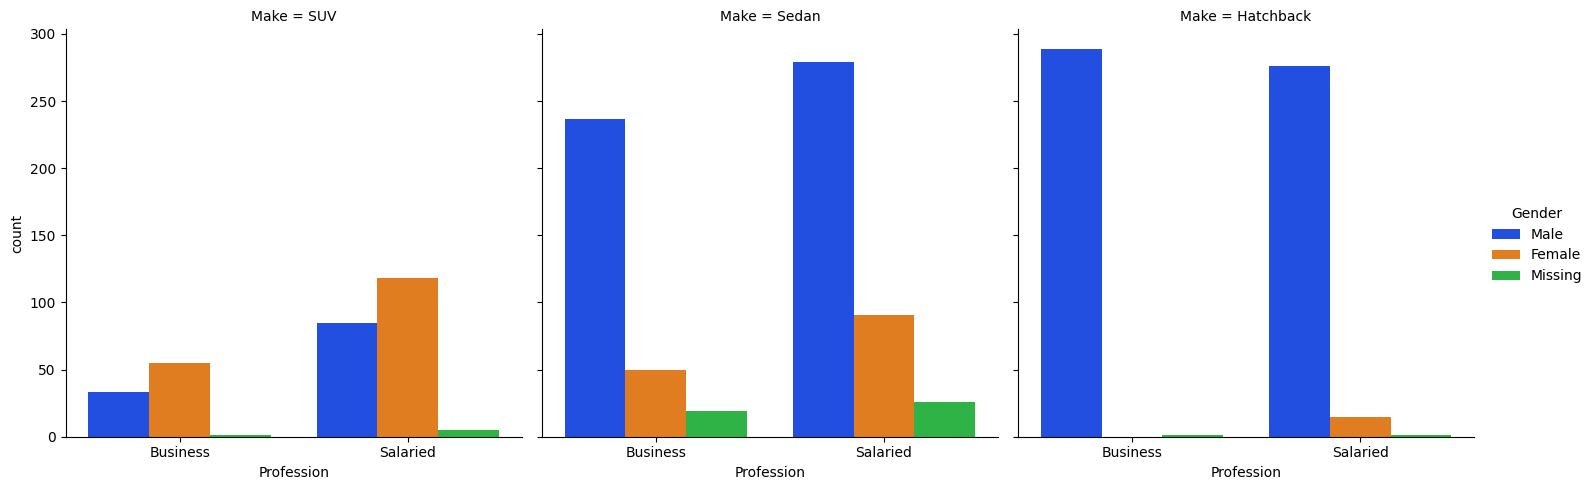

In [20]:
sns.catplot(data=df.fillna('Missing'), x="Profession", hue="Gender", col="Make", kind='count', palette='bright');

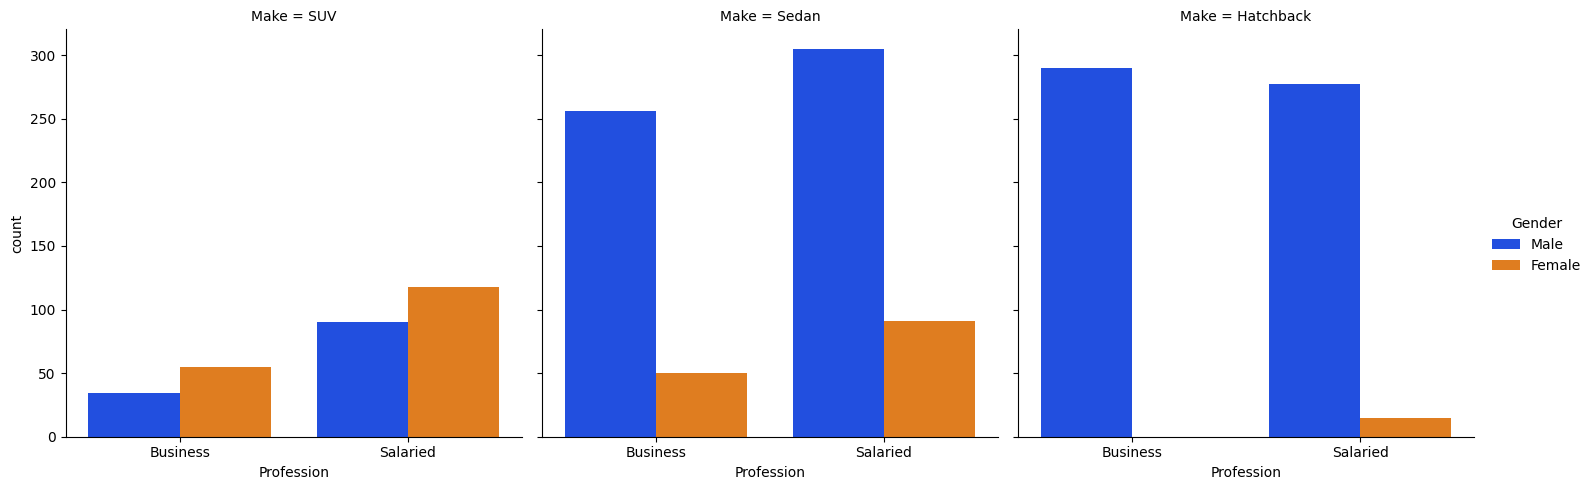

In [21]:
sns.catplot(data=df.fillna('Male'), x="Profession", hue="Gender", col="Make", kind='count', palette='bright');

From the graph above we cannot support the Sheldon Cooper's claim that a salaried male is an easier targert for an SUV sale over a Sedan even if the missing value is replaced with 'Male' (which is the mode)

- The count of Salaried Male purchasing an SUV ( value ranging between 50-100) is way lesser than Salaried Male purchasing a Sedan (value ranging around 300)


### 4. How does the the amount spent on purchasing automobiles vary by gender?

<Axes: xlabel='Price'>

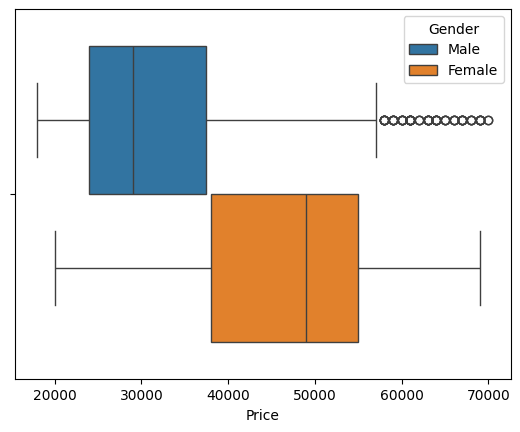

In [ ]:
sns.boxplot(data = df, x = 'Price', hue = 'Gender')

<Axes: xlabel='Price'>

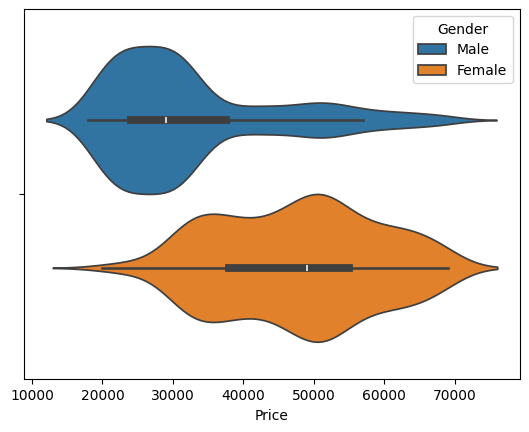

In [ ]:
sns.violinplot(data = df, x = 'Price', hue = 'Gender')

<Axes: ylabel='Price'>

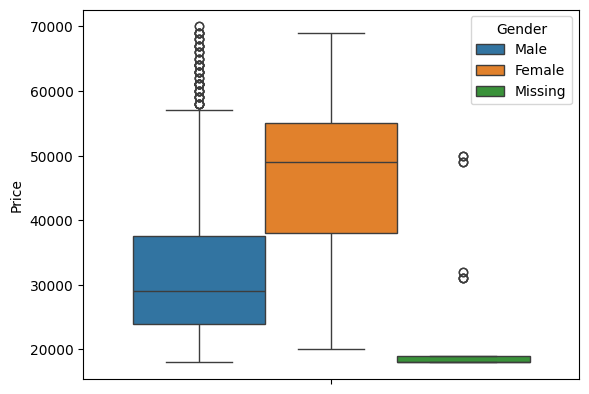

In [ ]:
sns.boxplot(data=df.fillna('Missing'), hue = 'Gender', y='Price')

<Axes: ylabel='Price'>

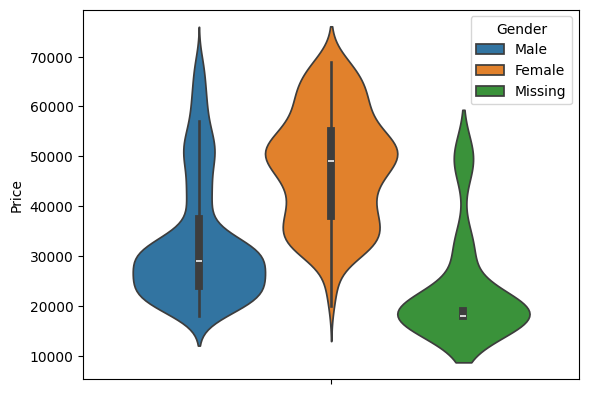

In [ ]:
sns.violinplot(data=df.fillna('Missing'), hue = 'Gender', y='Price')

<Axes: xlabel='Price', ylabel='Count'>

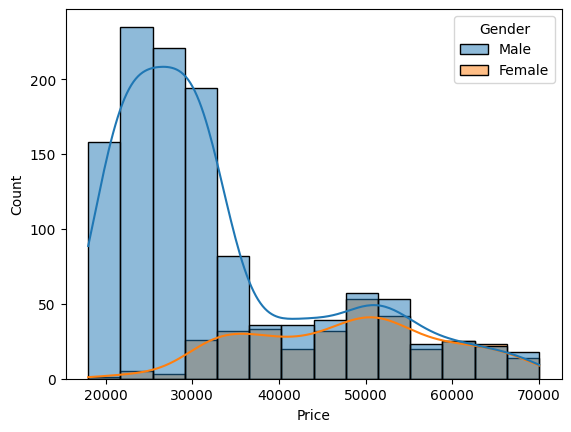

In [ ]:
sns.histplot(data = df, x = 'Price', hue = 'Gender', kde = True)

<Axes: xlabel='Price', ylabel='Count'>

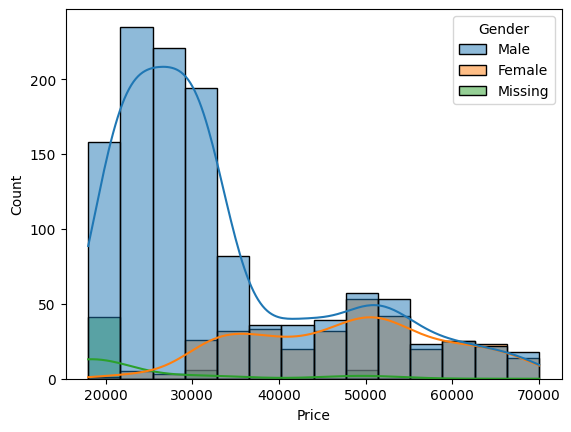

In [ ]:
sns.histplot(data = df.fillna('Missing'), x = 'Price', hue = 'Gender', kde = True)

<Axes: xlabel='Price', ylabel='Total_salary'>

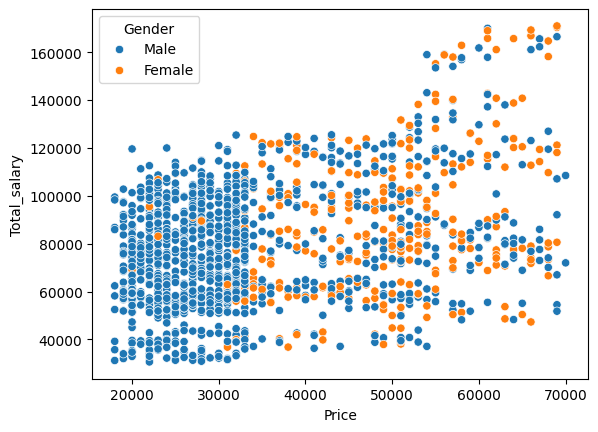

In [ ]:
sns.scatterplot(data = df, x = 'Price', y = 'Total_salary', hue = 'Gender')

<Axes: xlabel='Gender', ylabel='Price'>

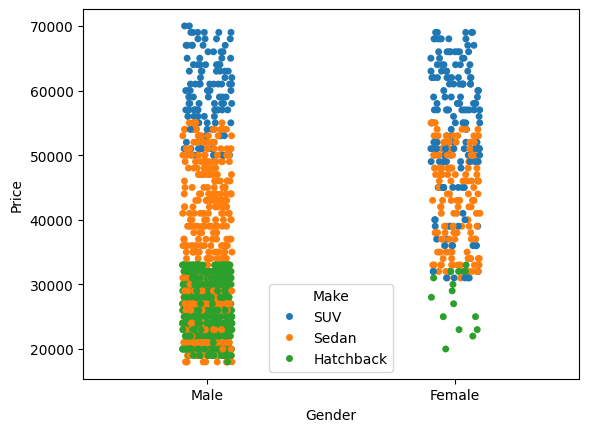

In [ ]:
sns.stripplot(data=df, x='Gender', y='Price', hue = 'Make')

- Female customers are spending between 20000-70000 where the median is 50000. Slightly left skewed.
- Male customers are spending between 18000-70000 where the median is 28000. highly right skewed.
- As we know females perfer SUVs which happen to expensive than the other models. Therefore, it is understandable why the median is at 50000.
- We know that male customers perfer Hatchback which is least expensive compared to other models. So the median is at the lower price.

**We can conclude that, women often spend more on expensive cars over men. So, with regards to the expense it is usually very high on automobile by the female customers.**


### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

<Axes: xlabel='Price'>

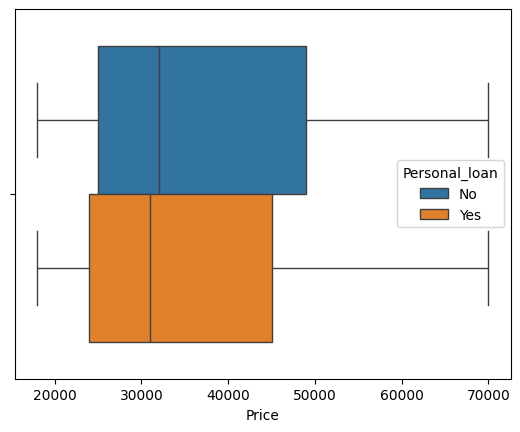

In [ ]:
sns.boxplot(data = df, x = 'Price', hue = 'Personal_loan')

<Axes: xlabel='Price', ylabel='Count'>

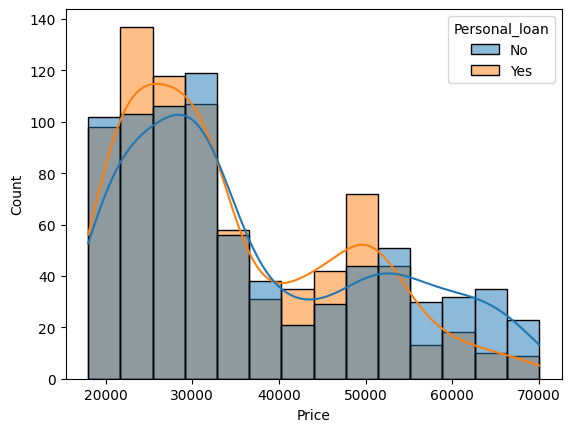

In [ ]:
sns.histplot(data = df, x = 'Price', hue = 'Personal_loan', kde = True)

<Axes: xlabel='Personal_loan', ylabel='Price'>

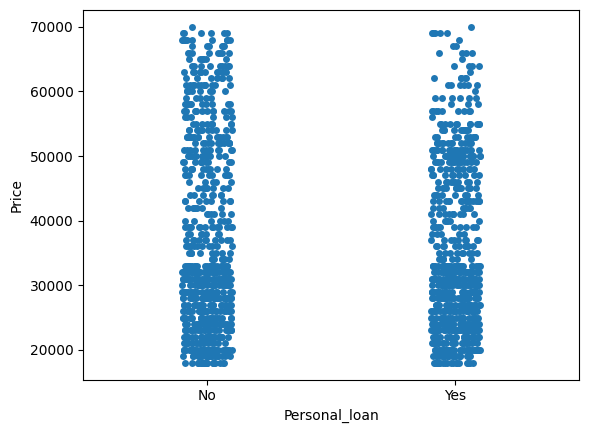

In [ ]:
sns.stripplot(data = df, y = 'Price', x = 'Personal_loan')

In [ ]:
temp = df[df['House_loan']=='No']
temp[temp['Personal_loan']=='Yes'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    11.068944
SUV           6.641366
Sedan        14.800759
dtype: float64

In [ ]:
temp = df[df['House_loan']=='No']
temp[temp['Personal_loan']=='No'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    10.879190
SUV          10.752688
Sedan        12.523719
dtype: float64

In [ ]:
temp = df[df['House_loan']=='Yes']
temp[temp['Personal_loan']=='Yes'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    7.337128
SUV          0.695762
Sedan        9.550917
dtype: float64

In [ ]:
temp = df[df['House_loan']=='Yes']
temp[temp['Personal_loan']=='No'].groupby('Make').size()/df.shape[0]*100

Make
Hatchback    7.526882
SUV          0.695762
Sedan        7.526882
dtype: float64

We know that 50% of the customers have taken personal loan.

- In these customers, 50% usually purchase under the price 32000.
- other 50% have bought between 32000-70000. However the customers, purchasing the cars above 50000 is less.

**From the above calculations we see that:**
- if the customer has **`House_loan = 'Yes'`** and **`Personal_loan = 'No'`** the probablity of him buying SUV is 0.69% which less. Where as other two models it is 7.5%

- if the customer has **`House_loan = 'Yes'`** and **`Personal_loan = 'Yes'`** the probablity of him buying SUV is 0.69% which less. Where as for hatchback is 7.3% and Sedan being at 9.5%.

- if the customer has **`House_loan = 'No'`** and **`Personal_loan = 'Yes'`** the probablity of him buying SUV is 6.6% which less. Where as for hatchback is 11% and Sedan being at 14%.

- if the customer has **`House_loan = 'No'`** and **`Personal_loan = 'No'`** the probablity of him buying SUV is 10% which less. Where as for hatchback is 10% and Sedan being at 12%.


What we infer is that having a personal loan inhibits customer from buying expensive cars like SUVs. However, having just an house loan without any personal loan increases the chance to purchase an SUV by 6%. On the other hand the probablity of purchasing other models like hatchback and sedan is still 7-9% with house loan other wise it come uptil 14%.

**Personal loan status determines whether a customer will be able to purchase an hgh end cars or not.**

### 6. How does having a working partner influence the purchase of higher-priced cars?

<Axes: xlabel='Price'>

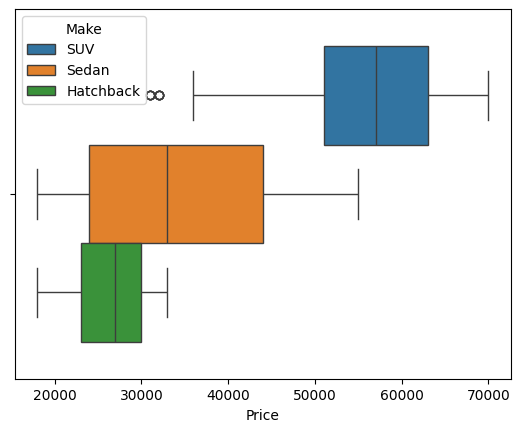

In [ ]:
sns.boxplot(data = df, x = 'Price' ,hue = 'Make')

<Axes: xlabel='Price', ylabel='Count'>

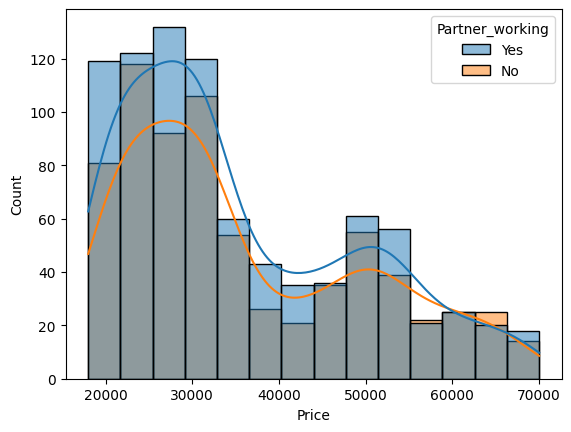

In [ ]:
sns.histplot(data = df, x = 'Price', hue = 'Partner_working', kde = True)

<Axes: xlabel='Total_salary'>

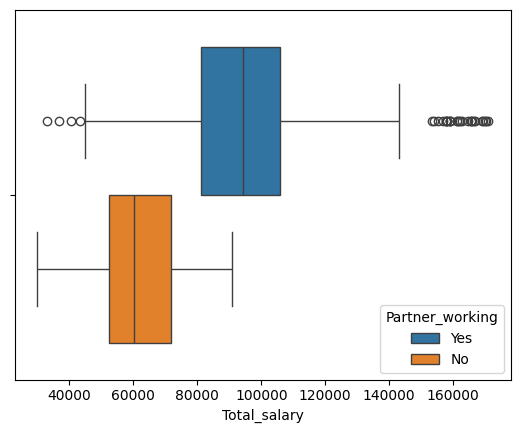

In [ ]:
sns.boxplot(data = df, x = 'Total_salary' ,hue = 'Partner_working')

<Axes: xlabel='Total_salary', ylabel='Price'>

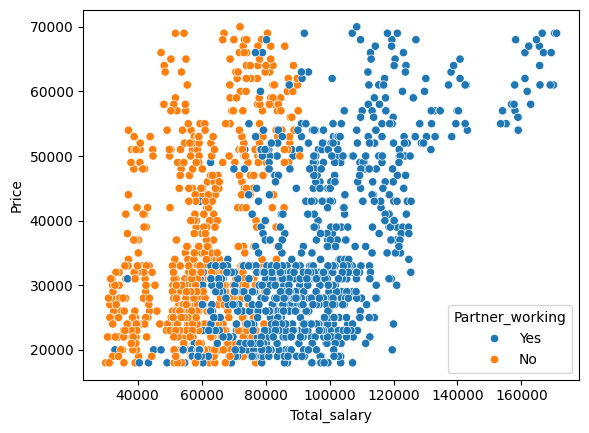

In [ ]:
sns.scatterplot(data = df, y = 'Price', x = 'Total_salary' ,hue = 'Partner_working')

<Axes: xlabel='Make', ylabel='Total_salary'>

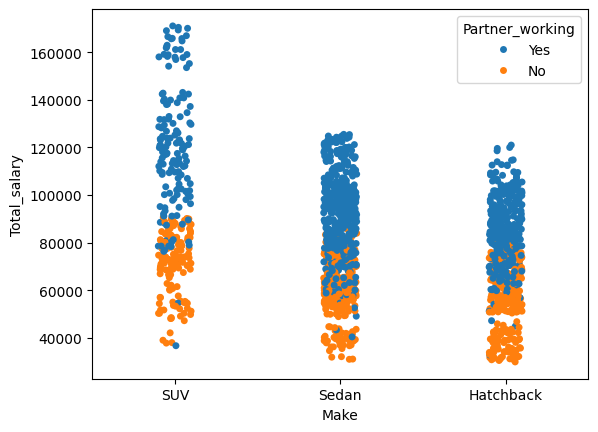

In [ ]:
sns.stripplot(data = df, x = 'Make', y = 'Total_salary' ,hue = 'Partner_working')

- From the first boxplot we notice that SUVs are highly priced cars.
- From the second graph we notice that the curve of KDE is placed above for the `Partner_working = 'Yes'` over `'No'`. So this makes
- From the second baox plot (Total_salary with hue as 'Partner_working') we clearly see that the Total_salary is relatively higher when the Partner is working.
    - If the `Partner_working = No` the maximum Total_salary is 90000.
    - If the `Partner_working = Yes` the median Total_salary is 90000.

**Based on these points we say if the partner is working the Total_salary is relatively high.**

From the scatter plot between Price and Total_salary

**`Partner_working = 'NO'`**
- The customers with `Total_income <= 90000`, mainly purchase cars pricing <=50000. But this doesn't completely eleminate the fact that they are not purchasing cars princing between 50000-70000.

**`Partner_working = 'YES'`**
- However, the customers with working partner are very high in number.
- Even though there is significant number of purchases between the price range 18000-50000, There is a significant shift in data points with the Total_salary >=120000. where,
 - These customers are only purchasing cars pricing above 50000.


**Hence, we can conclude that if the partner is working then the impact is  positive to total income of the customer resulting in expensive purchases.**

## Actionable Insights & Recommendations

- Majority of the customers are Married.
- SUVs are the models which can be classified as expensive as their median price is around 60000.
- Hatchbacks are the least expensive with the median price of 28000.
- Female customers mostly perfer SUVs and least Hatchback. Male customers mostly perfer Hatchback and least SUVs.
- If the partner is working the Total_salary is higher and often these customers are purchasing expensive cars.
- The customer with high Total_salary with no house loans tends to buy high end SUVs irrespective of them having personal loan. The median here will 90000, and First quartile being 75000 (for SUVs). Otherwise, sedans are higly prefered.
- The customers with 0 dependents are the sole earners and they don't prefer Sedan but mostly Hatchback.
- Hatchback are most commonly prefered cars by the customers with 2 or 3 dependents irrespective of partner's working status.
- Sedan are mostly prefered by customers with 1 dependent irrespective of partner's working status.
- Most prefered cars by single customers are hatchback. Where as for Married it is sedan.
- Female business customers do not perfer hatchback. Instead they prefer SUVs. This can be applied to salaried female customers.


